# Import packages

In [1]:
%load_ext autoreload
%autoreload 2

import os, sys, sys
from pathlib import Path
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break

from data_wrangling import specific_utils, process_monkey_information, general_utils
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features
from visualization.matplotlib_tools import plot_behaviors_utils
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.topic_based_neural_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.topic_based_neural_analysis.planning_and_neural import planning_and_neural_class, pn_utils, pn_helper_class
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class, cca_utils, cca_cv_utils
from neural_data_analysis.neural_analysis_tools.cca_methods.cca_plotting import cca_plotting, cca_plot_lag_vs_no_lag, cca_plot_cv
from machine_learning.ml_methods import regression_utils, ml_methods_utils, regz_regression_utils, ml_methods_class, classification_utils, ml_plotting_utils


import sys
import math
import gc
import subprocess
from pathlib import Path
from importlib import reload

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from scipy import linalg, interpolate
from scipy.signal import fftconvolve
from scipy.io import loadmat
from scipy import sparse
import torch
from numpy import pi

# Machine Learning imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.multivariate.cancorr import CanCorr

# Neuroscience specific imports
import neo
import rcca

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")

%load_ext autoreload
%autoreload 2

done
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Retrieve data

## exp

## get data

In [2]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"

In [38]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0416"

In [39]:
reduce_y_var_lags = True
planning_data_by_point_exists_ok = True
y_data_exists_ok = True

pn = planning_and_neural_class.PlanningAndNeural(raw_data_folder_path=raw_data_folder_path)
pn.prep_data_to_analyze_planning(planning_data_by_point_exists_ok=planning_data_by_point_exists_ok)
pn.planning_data_by_point, cols_to_drop = general_utils.drop_columns_with_many_nans(
    pn.planning_data_by_point)
pn.get_x_and_y_data_for_modeling(exists_ok=y_data_exists_ok, reduce_y_var_lags=reduce_y_var_lags)

Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Schro/data_0416/binned_spikes_df_0p1.csv
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Schro/data_0416/planning_data_by_point/opt_arc_stop_closest/test/cur_vis_0_1_window_-50cm_0cm
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Schro/data_0416/planning_data_by_point/opt_arc_stop_closest/control/cur_vis_0_1_window_-50cm_0cm
Overlap: []
Percentage overlap relative to df1: 0.00%
Percentage overlap relative to df2: 0.00%
Average percentage overlap: 0.00%
Loaded behav_data_by_bin from all_monkey_data/target_decoder/monkey_Schro/data_0416/behav_data_by_point.csv
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
There are 1 duplicated point_index in bin_info. Note: one_point_index_per_bin is False
0.2% of rows are dropped in planning_data_by_bin due to having missing values
binned_spikes_df.s

In [5]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

## compare dist of every var

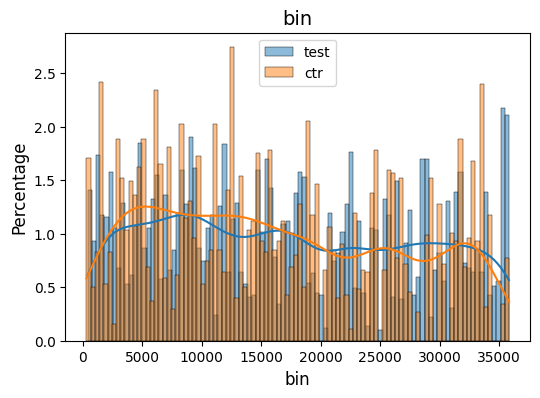

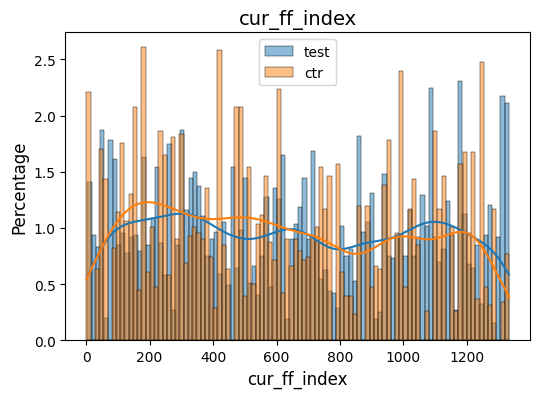

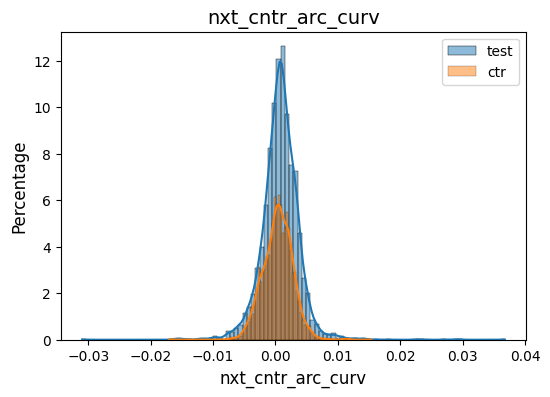

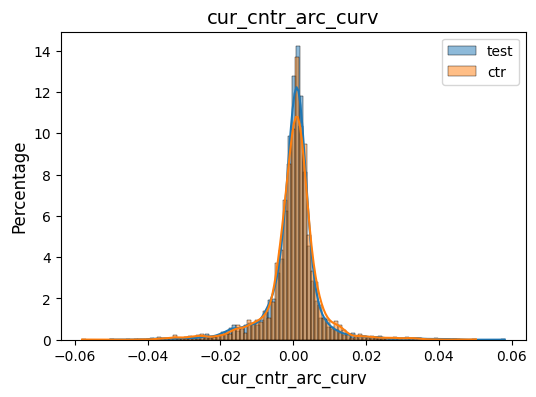

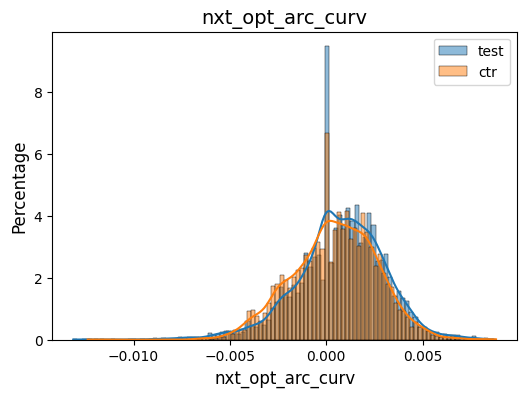

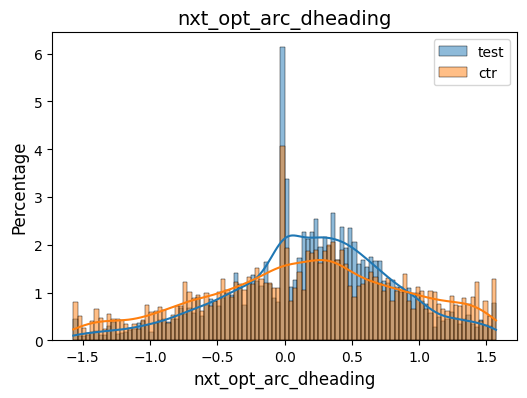

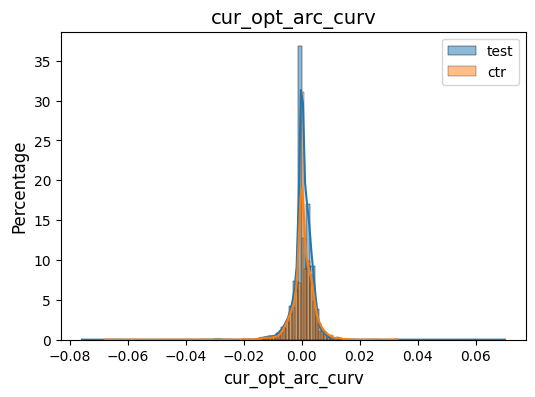

KeyboardInterrupt: 

In [ ]:
test_data = pn.y_var[pn.y_var['whether_test'] == 1]
ctr_data = pn.y_var[pn.y_var['whether_test'] == 0]

for col in test_data.columns:
#for col in ['target_index']:
    # compare the distribution through histplot (by percentage) of the column in test_data and ctr_data
    plt.figure(figsize=(6, 4))
    sns.histplot(test_data[col].values, label='test', alpha=0.5, stat='percent', kde=True, bins=100)
    sns.histplot(ctr_data[col].values, label='ctr', alpha=0.5, stat='percent', kde=True, bins=100)
    plt.title(f'{col}', fontsize=14)
    plt.xlabel(f'{col}', fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.legend()
    plt.show()
    

## check NA

In [ ]:
general_utils.check_na_in_df(pn.planning_data_by_point)


NA Values Analysis for DataFrame (75,491 rows)

Number of rows with at least one NA value: 17,199

Columns with NA values:
------------------------------------------------------------
nxt_cntr_arc_curv                           7,774 (  10.3%)
cur_cntr_arc_curv                           2,466 (   3.3%)
nxt_opt_arc_curv                            7,774 (  10.3%)
cur_opt_arc_curv                            2,466 (   3.3%)
cur_opt_arc_end_heading                     2,466 (   3.3%)
cur_cntr_arc_end_heading                    2,466 (   3.3%)
angle_opt_arc_from_cur_end_to_nxt           9,448 (  12.5%)
angle_cntr_arc_from_cur_end_to_nxt          9,448 (  12.5%)
distance_from_monkey_pos_target_last_seen    9,627 (  12.8%)
monkey_y_target_last_seen                   9,627 (  12.8%)
target_last_seen_distance                   9,627 (  12.8%)
time_target_last_seen                       9,627 (  12.8%)
monkey_x_target_last_seen                   9,627 (  12.8%)
monkey_angle_target_last_seen     

(       cur_ff_index  nxt_cntr_arc_curv  stop_point_index  cur_cntr_arc_curv  \
 146               1           -0.00245              1945                NaN   
 147               1           -0.00250              1945                NaN   
 148               1           -0.00253              1945                NaN   
 149               1           -0.00255              1945                NaN   
 150               1           -0.00255              1945                NaN   
 ...             ...                ...               ...                ...   
 75486          1333            0.00059            218192                NaN   
 75487          1333            0.00059            218192                NaN   
 75488          1333            0.00059            218192                NaN   
 75489          1333            0.00059            218192                NaN   
 75490          1333            0.00059            218192                NaN   
 
        nxt_opt_arc_curv  nxt_opt_arc_

## var's corr

In [ ]:
nxt_cols = [col for col in pn.y_var.columns if 'nxt' in col]
corr_df = pn.y_var.corr()[nxt_cols]

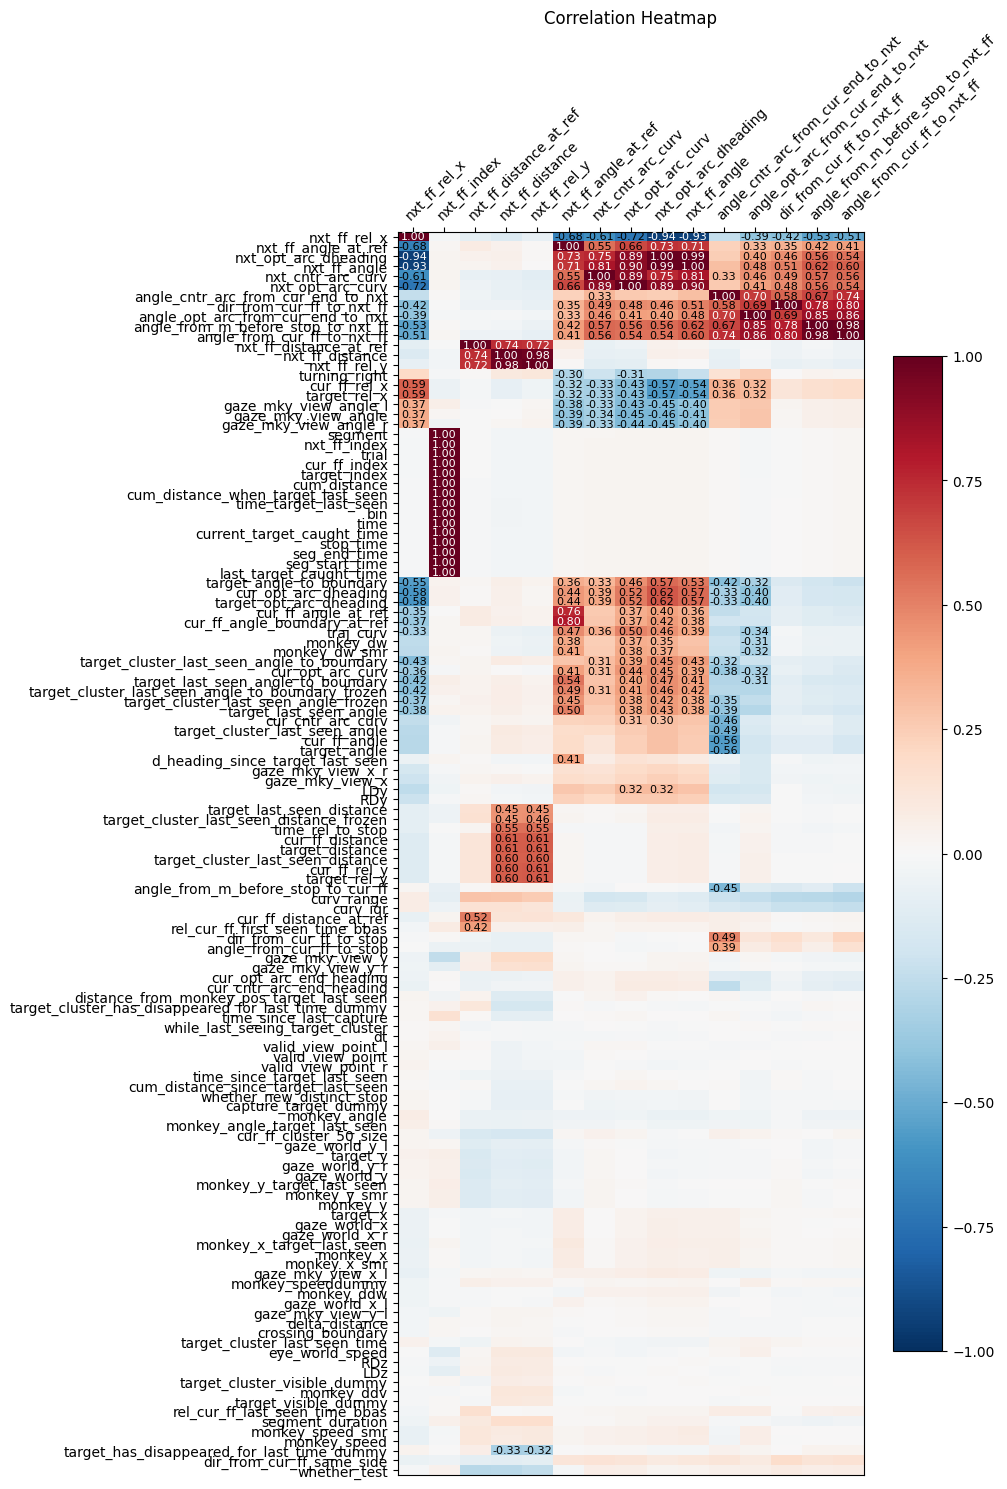

In [ ]:
ml_plotting_utils.plot_correlation_heatmap(corr_df)

# LR: on all data together

### Just nxt ff vars

In [ ]:
columns_of_interest = ['whether_test']

In [ ]:
columns_of_interest = [col for col in pn.y_var.columns if 'nxt' in col]

In [ ]:
x_var, y_var = pn.get_x_and_y_var_for_lr(test_or_control='test', use_x_var_lags=True)

y_var_sub = y_var[columns_of_interest]
# With x var lags
y_var_lr_df = neural_data_modeling.get_y_var_lr_df(
    x_var, y_var_sub, verbose=True)

nxt_cntr_arc_curv r: 0.208, r_squared: 0.043, p_values: 0.0
nxt_opt_arc_curv r: 0.215, r_squared: 0.046, p_values: 0.0
nxt_opt_arc_dheading r: 0.224, r_squared: 0.05, p_values: 0.0
nxt_ff_angle r: 0.228, r_squared: 0.052, p_values: 0.0
nxt_ff_index r: 0.999, r_squared: 0.998, p_values: 0.0
nxt_ff_distance r: 0.318, r_squared: 0.101, p_values: 0.0
angle_opt_arc_from_cur_end_to_nxt r: 0.189, r_squared: 0.036, p_values: 0.036
angle_cntr_arc_from_cur_end_to_nxt r: 0.219, r_squared: 0.048, p_values: 0.0
nxt_ff_rel_x r: 0.223, r_squared: 0.05, p_values: 0.0
nxt_ff_rel_y r: 0.321, r_squared: 0.103, p_values: 0.0
angle_from_m_before_stop_to_nxt_ff r: 0.179, r_squared: 0.032, p_values: 0.237
dir_from_cur_ff_to_nxt_ff r: 0.219, r_squared: 0.048, p_values: 0.0
angle_from_cur_ff_to_nxt_ff r: 0.182, r_squared: 0.033, p_values: 0.152
nxt_ff_distance_at_ref r: 0.196, r_squared: 0.039, p_values: 0.005
nxt_ff_angle_at_ref r: 0.196, r_squared: 0.038, p_values: 0.005


## plot

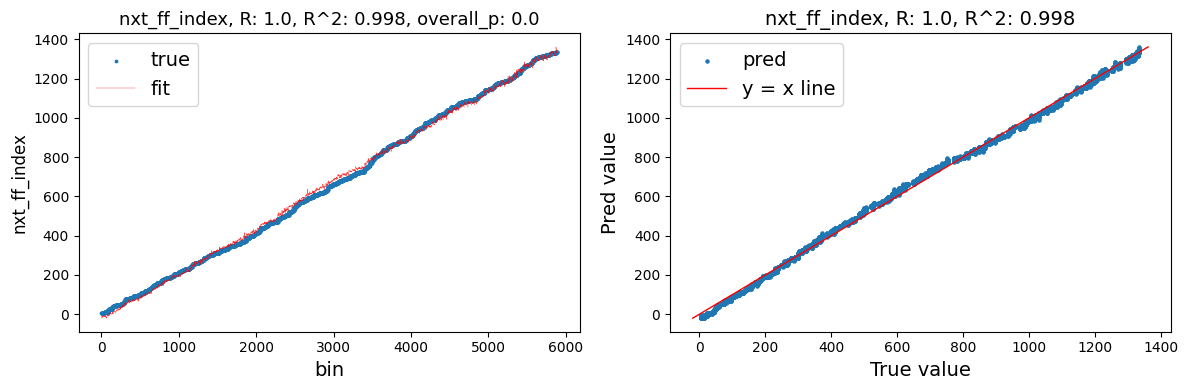

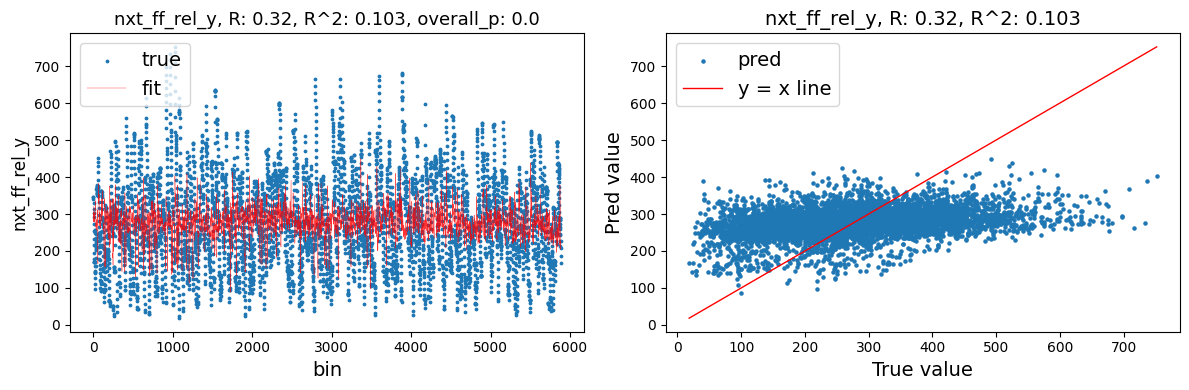

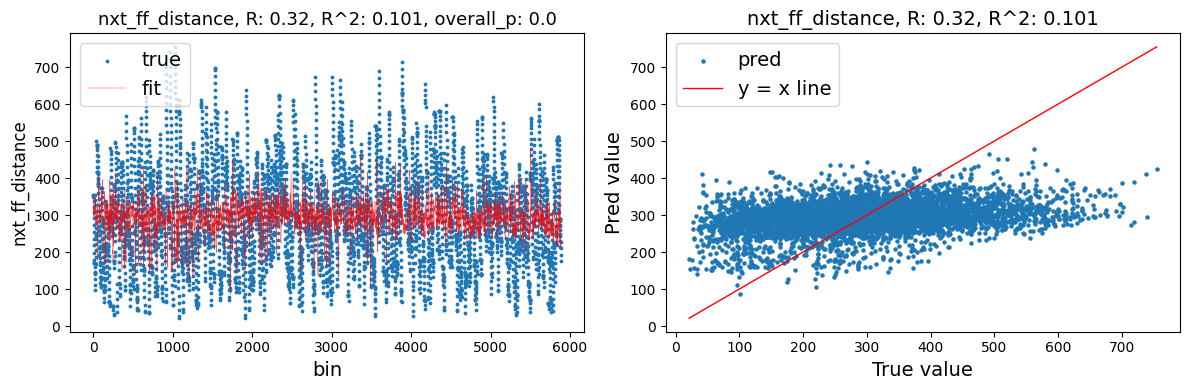

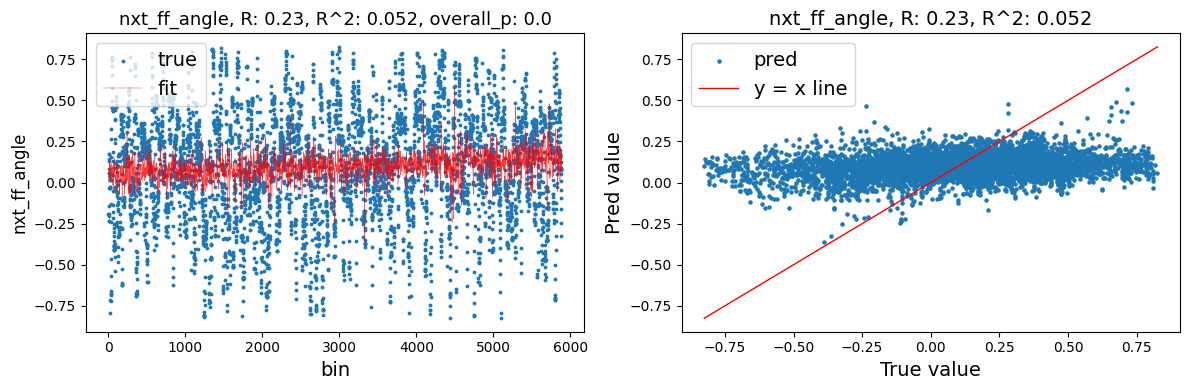

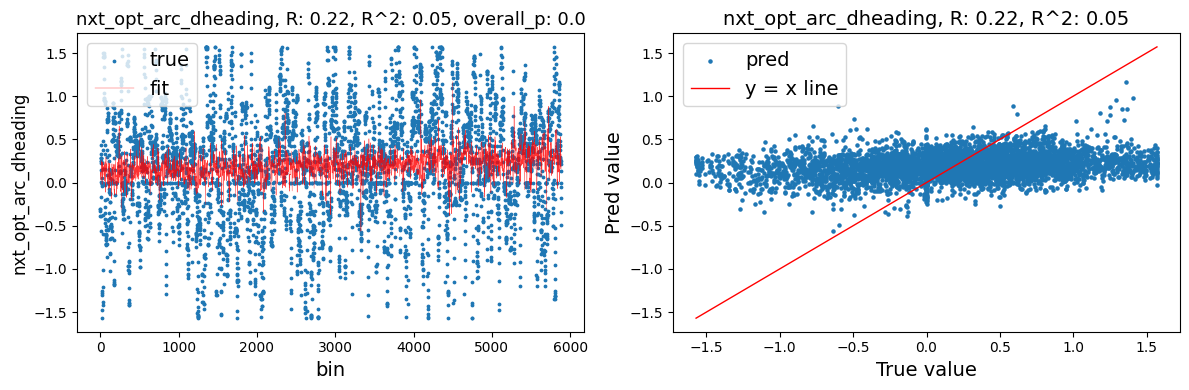

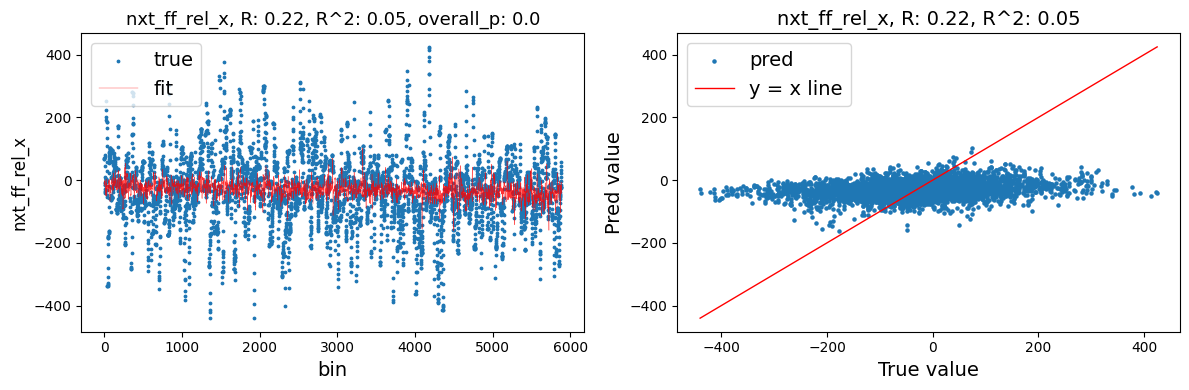

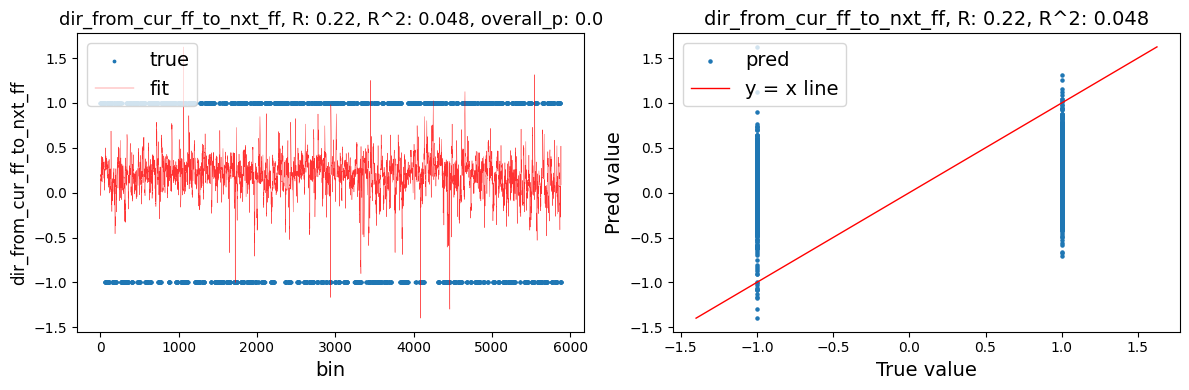

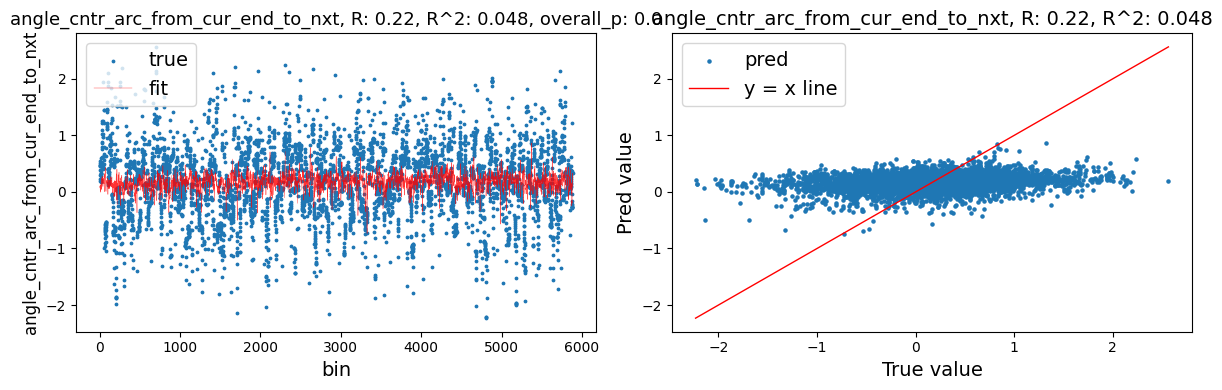

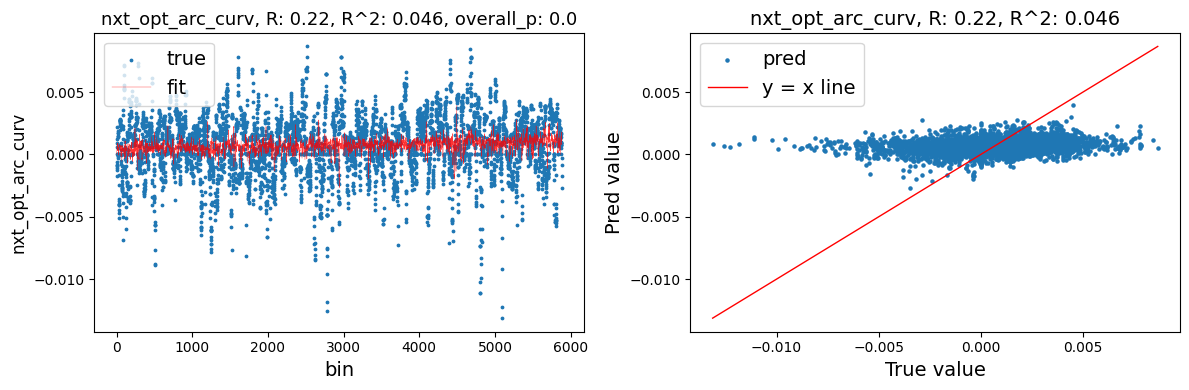

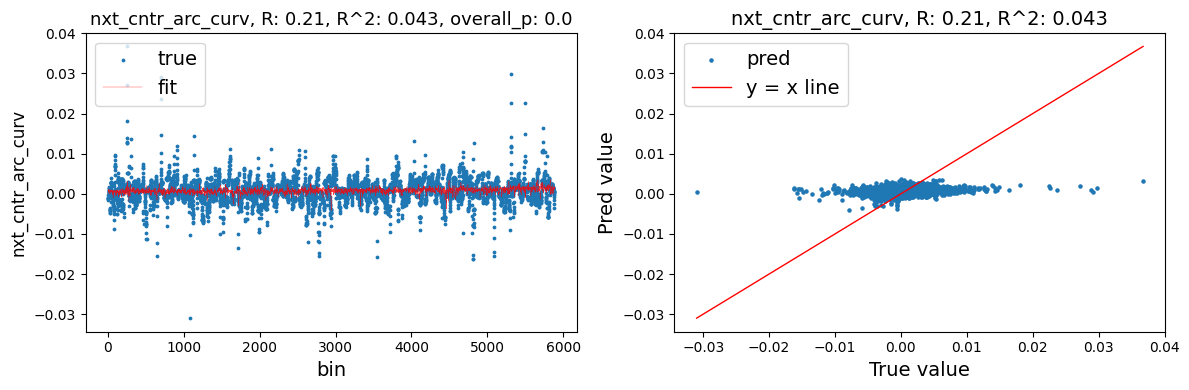

In [ ]:
# Plot features from y_var_lr_df
max_plot_number = 10
count = 0
bins_to_plot = range(len(y_var))

for i, column in enumerate(y_var_lr_df.feature.values): # so that features are plotted in the order of correlation
    if i >= max_plot_number:
        break
    plot_neural_data.plot_regression(y_var, column, x_var, bins_to_plot=None, min_r_squared_to_plot=0.3)

# LR: train-test split

## regularized

In [ ]:
columns_of_interest = ['whether_test']

In [ ]:
reload(regz_regression_utils)

<module 'machine_learning.ml_methods.regz_regression_utils' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/machine_learning/ml_methods/regz_regression_utils.py'>

y_var_column: whether_test
   Model Train R2 Train Pearson Corr Train Explained Variance  Test R2  \
0  ridge   0.0242             0.1557                   0.0242  -0.0710   

  Test Pearson Corr Test Explained Variance  
0           -0.0316                 -0.0354  
REGRESSION REPORT: Ridge Regression
R²: -0.0710
Explained Variance: -0.0354
Pearson Correlation on Test Data: -0.0316


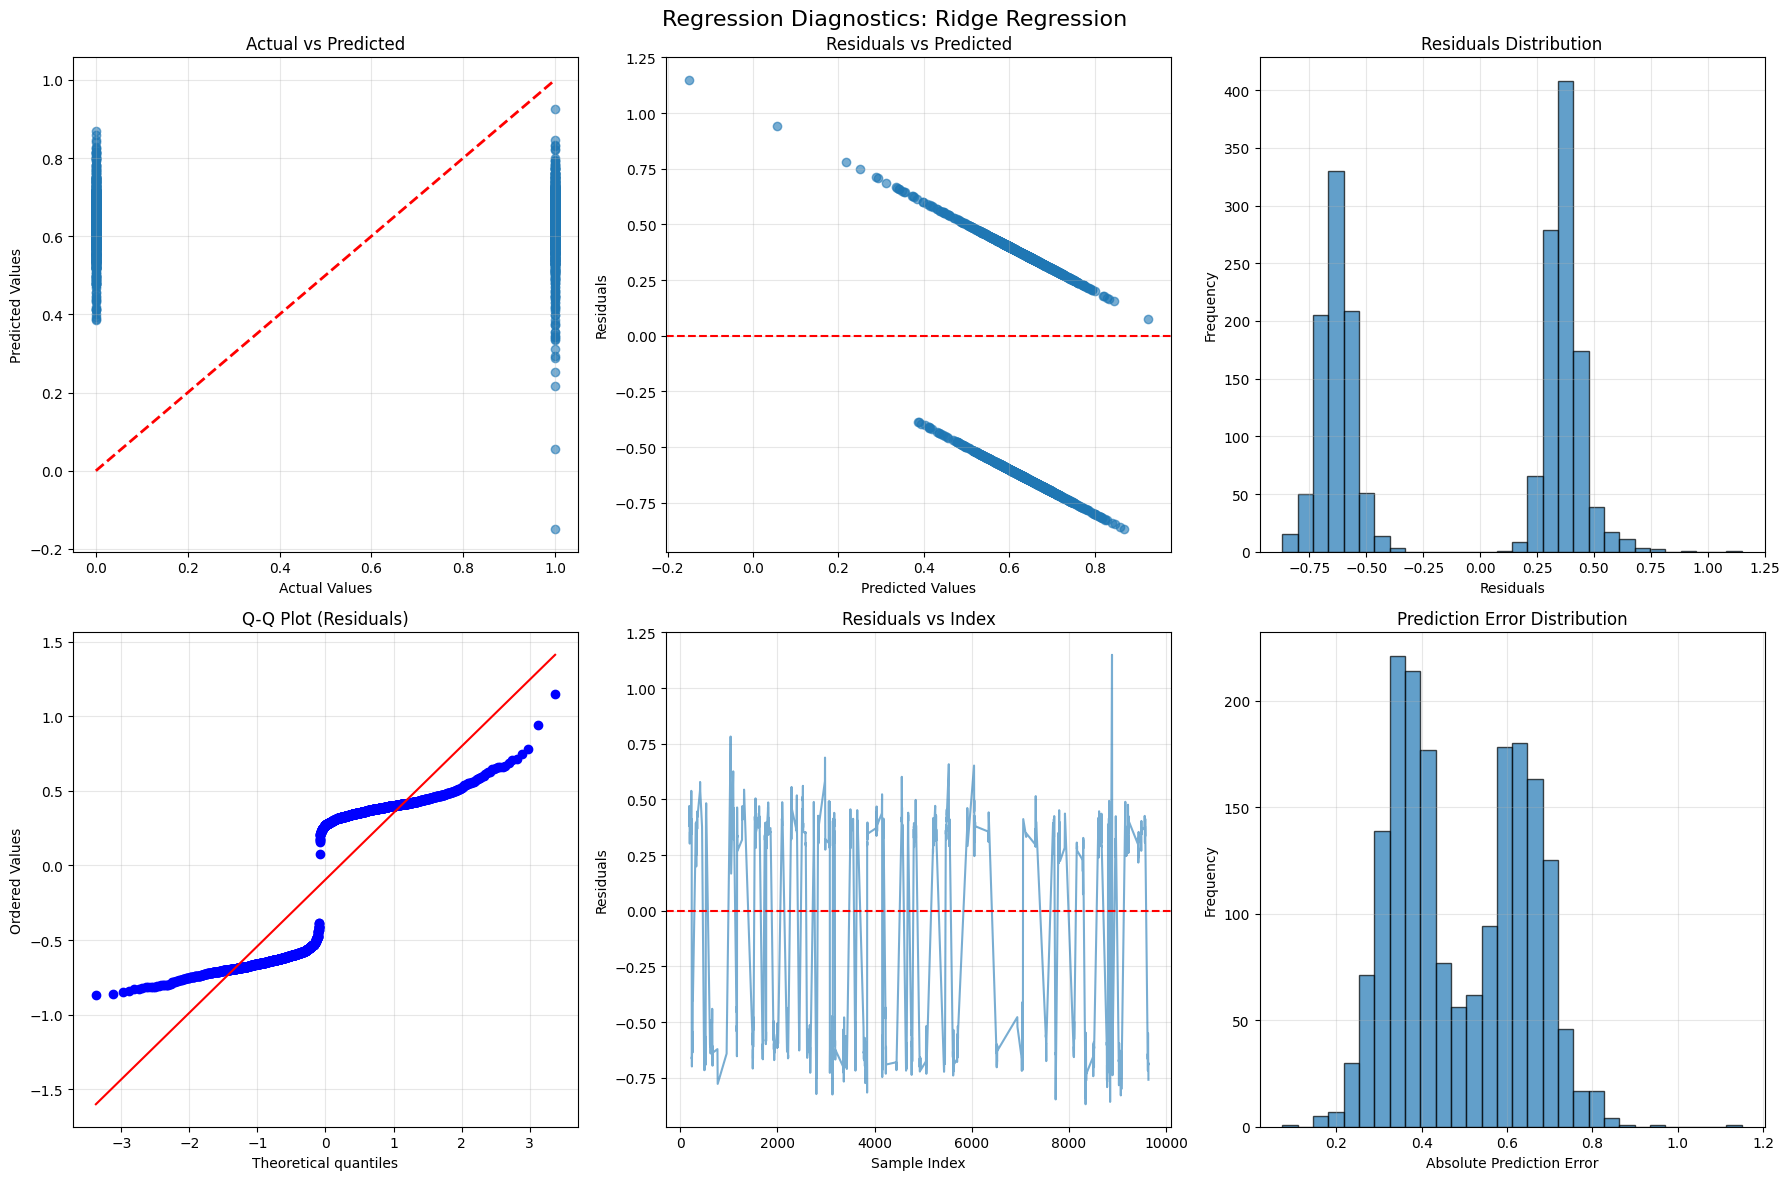

REGRESSION REPORT: OLS (no regularization) (train)
R²: 0.0243
Explained Variance: 0.0243
Pearson Correlation on Test Data: 0.1558
REGRESSION REPORT: OLS (no regularization) (test)
R²: -0.0725
Explained Variance: -0.0370
Pearson Correlation on Test Data: -0.0329


/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/machine_learning/ml_methods/regz_regression_utils.py:166: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = ols_model.params[0]


REGRESSION REPORT: Ridge (train)
R²: 0.0242
Explained Variance: 0.0242
Pearson Correlation on Test Data: 0.1557
REGRESSION REPORT: Ridge (test)
R²: -0.0710
Explained Variance: -0.0354
Pearson Correlation on Test Data: -0.0316
REGRESSION REPORT: Lasso (train)
R²: 0.0045
Explained Variance: 0.0045
Pearson Correlation on Test Data: 0.0719
REGRESSION REPORT: Lasso (test)
R²: -0.0348
Explained Variance: -0.0003
Pearson Correlation on Test Data: 0.0203
REGRESSION REPORT: Elastic Net (train)
R²: 0.0071
Explained Variance: 0.0071
Pearson Correlation on Test Data: 0.0876
REGRESSION REPORT: Elastic Net (test)
R²: -0.0402
Explained Variance: -0.0043
Pearson Correlation on Test Data: -0.0015
REGRESSION REPORT: Ridge CV (train)
R²: 0.0221
Explained Variance: 0.0221
Pearson Correlation on Test Data: 0.1490
REGRESSION REPORT: Ridge CV (test)
R²: -0.0605
Explained Variance: -0.0241
Pearson Correlation on Test Data: -0.0157
REGRESSION REPORT: Lasso CV (train)
R²: 0.0000
Explained Variance: 0.0000
Pears

/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
x_var, y_var = pn.get_x_and_y_var_for_lr(test_or_control='both', use_x_var_lags=True)
X_train, X_test, y_train, y_test = ml_methods_utils.train_test_split_based_on_segments(x_var, y_var)

# Basic usage with comprehensive metrics
for y_var_column in columns_of_interest:
    print('y_var_column:', y_var_column)
    y_train_var =  y_train[y_var_column]   
    y_test_var = y_test[y_var_column]

    results, results_df, y_pred_train, y_pred_test = regz_regression_utils.regularized_regression(
        X_train, y_train_var, X_test, y_test_var, method='ridge', alpha=1.0
    )
    print(results_df)

    # # Create comprehensive report
    report = regz_regression_utils.regression_metrics_report(
        y_test_var, y_pred_test, model_name="Ridge Regression", show_plots=True
    )
        
    results, results_df = regz_regression_utils.compare_regularized_models(X_train, y_train_var, X_test, y_test_var, verbose=True, show_plots=False)
    regz_regression_utils.print_model_comparison_summary(results)
    

## split based on targets

In [ ]:
# select 'random_dummy'
pn.y_var = pn_utils.randomly_assign_random_dummy_based_on_targets(pn.y_var)
columns_of_interest = ['random_dummy']

In [ ]:
columns_of_interest = ['whether_test']

In [ ]:
# select all nxt_ff variables
columns_of_interest = [col for col in pn.y_var.columns if 'nxt' in col]

In [ ]:
# select all cur_ff variables
columns_of_interest = [col for col in pn.y_var.columns if 'cur' in col]

y_var_column: cur_ff_index

--- Multiple Linear Regression: cur_ff_index ---
R-squared (train):        0.9982
Adjusted R-squared:       0.9982
R-squared (test):         0.9980
Pearson Corr (test):      0.9990
MAE (test):               15.6285
MSE (test):               310.9910
RMSE (test):              17.6349


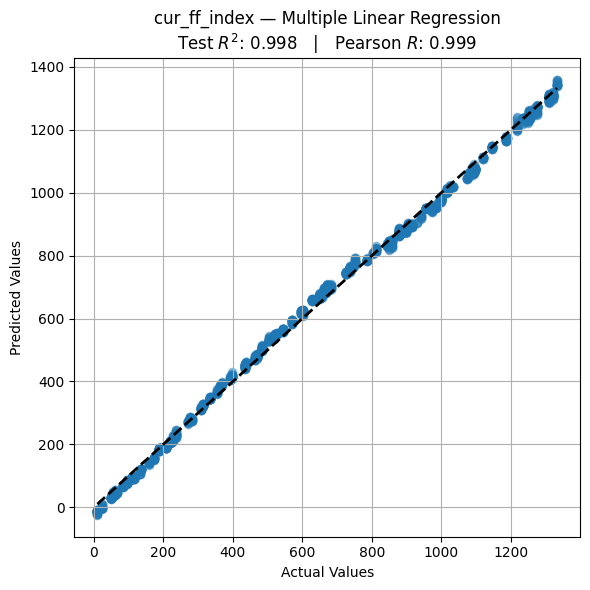

y_var_column: nxt_cntr_arc_curv

--- Multiple Linear Regression: nxt_cntr_arc_curv ---
R-squared (train):        0.0342
Adjusted R-squared:       0.0117
R-squared (test):         -0.0220
Pearson Corr (test):      0.0885
MAE (test):               0.0022
MSE (test):               0.0000
RMSE (test):              0.0029


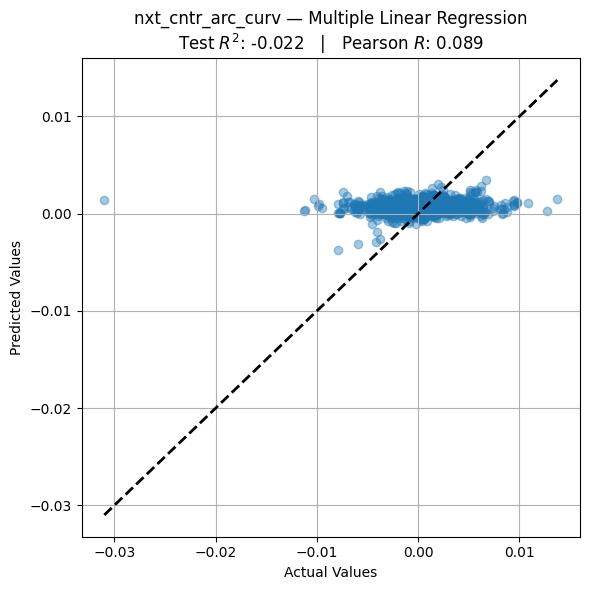

y_var_column: cur_cntr_arc_curv

--- Multiple Linear Regression: cur_cntr_arc_curv ---
R-squared (train):        0.0406
Adjusted R-squared:       0.0183
R-squared (test):         -0.0116
Pearson Corr (test):      0.0672
MAE (test):               0.0047
MSE (test):               0.0001
RMSE (test):              0.0076


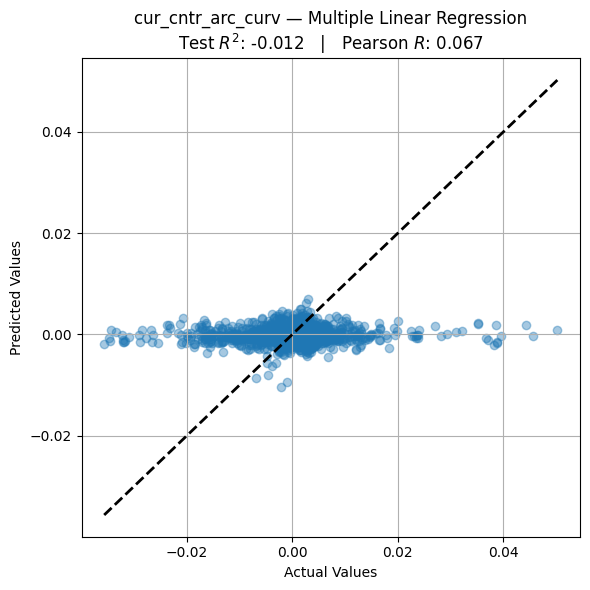

y_var_column: nxt_opt_arc_curv

--- Multiple Linear Regression: nxt_opt_arc_curv ---
R-squared (train):        0.0353
Adjusted R-squared:       0.0129
R-squared (test):         -0.0167
Pearson Corr (test):      0.0837
MAE (test):               0.0019
MSE (test):               0.0000
RMSE (test):              0.0024


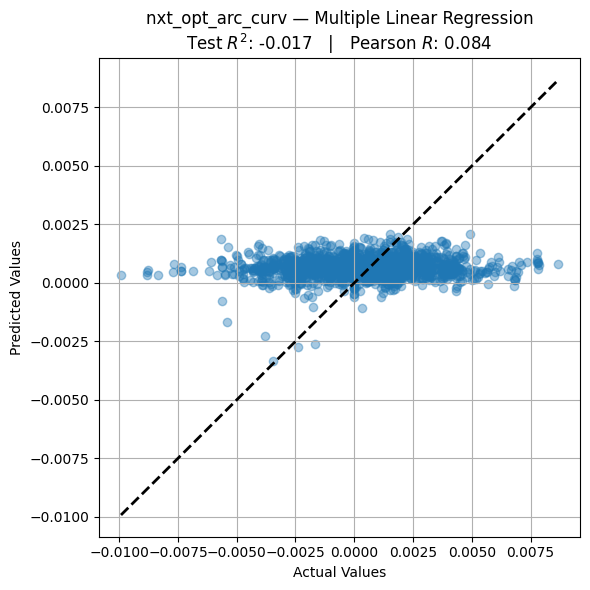

y_var_column: cur_opt_arc_curv

--- Multiple Linear Regression: cur_opt_arc_curv ---
R-squared (train):        0.0477
Adjusted R-squared:       0.0255
R-squared (test):         -0.0045
Pearson Corr (test):      0.0840
MAE (test):               0.0024
MSE (test):               0.0000
RMSE (test):              0.0044


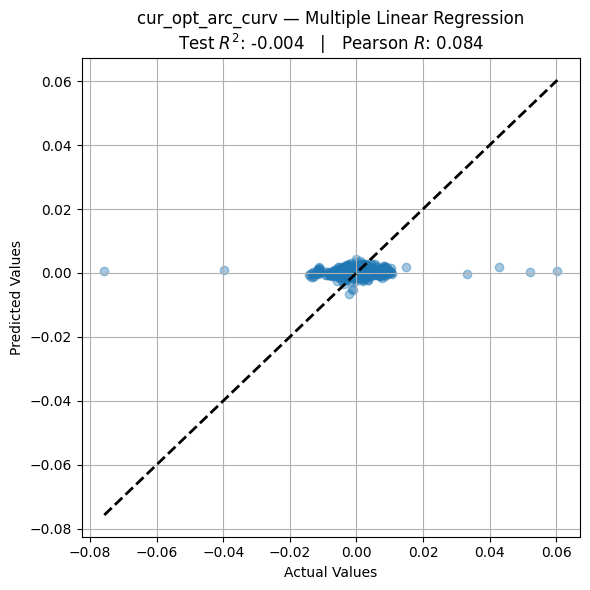

y_var_column: cur_opt_arc_dheading

--- Multiple Linear Regression: cur_opt_arc_dheading ---
R-squared (train):        0.0508
Adjusted R-squared:       0.0287
R-squared (test):         -0.0337
Pearson Corr (test):      0.0446
MAE (test):               0.2690
MSE (test):               0.1520
RMSE (test):              0.3899


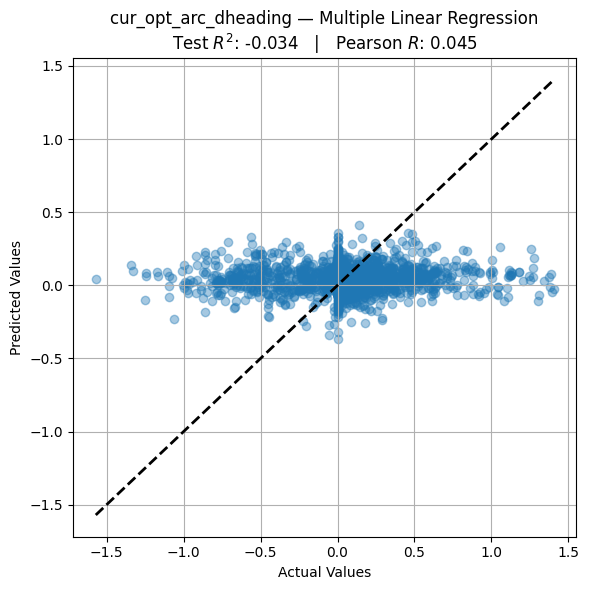

y_var_column: cur_ff_distance

--- Multiple Linear Regression: cur_ff_distance ---
R-squared (train):        0.1701
Adjusted R-squared:       0.1508
R-squared (test):         0.1173
Pearson Corr (test):      0.3644
MAE (test):               65.1418
MSE (test):               6468.6072
RMSE (test):              80.4277


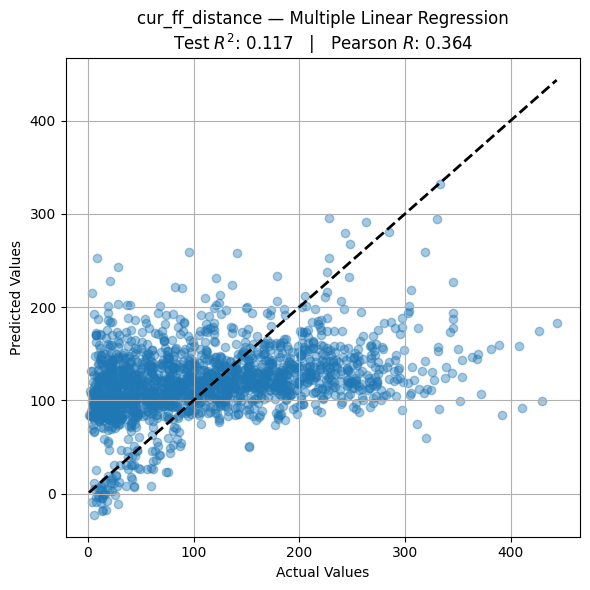

y_var_column: cur_ff_angle

--- Multiple Linear Regression: cur_ff_angle ---
R-squared (train):        0.0317
Adjusted R-squared:       0.0092
R-squared (test):         -0.0286
Pearson Corr (test):      -0.0038
MAE (test):               0.3038
MSE (test):               0.2342
RMSE (test):              0.4839


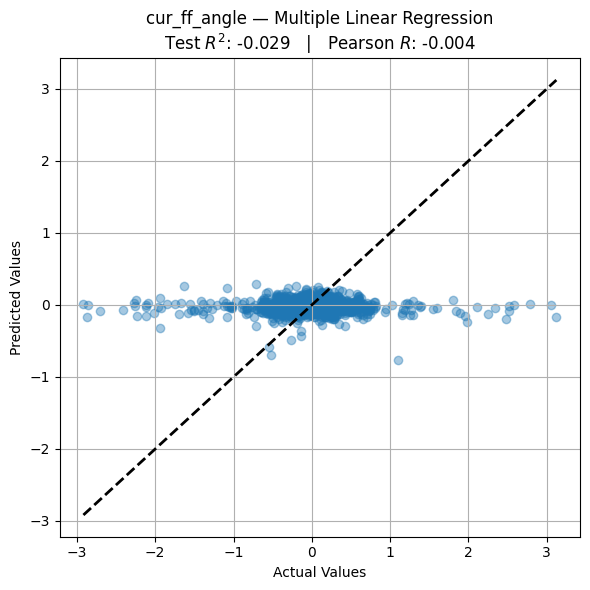

y_var_column: cur_opt_arc_end_heading

--- Multiple Linear Regression: cur_opt_arc_end_heading ---
R-squared (train):        0.0282
Adjusted R-squared:       0.0056
R-squared (test):         -0.0163
Pearson Corr (test):      0.0236
MAE (test):               1.6264
MSE (test):               3.6621
RMSE (test):              1.9137


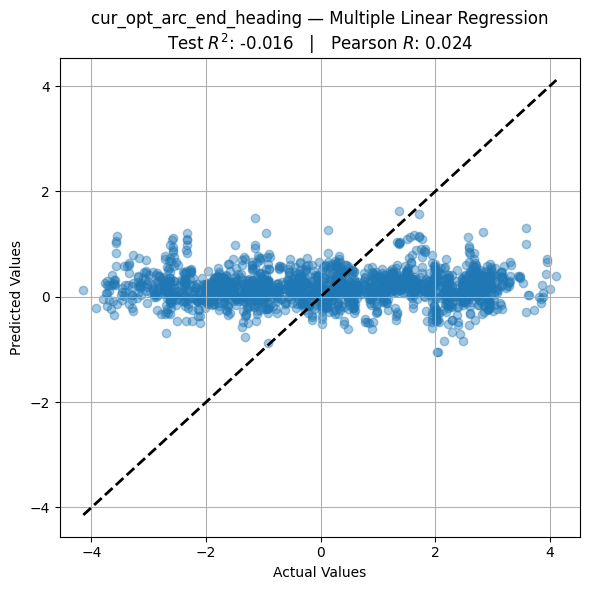

y_var_column: cur_cntr_arc_end_heading

--- Multiple Linear Regression: cur_cntr_arc_end_heading ---
R-squared (train):        0.0313
Adjusted R-squared:       0.0088
R-squared (test):         -0.0220
Pearson Corr (test):      0.0119
MAE (test):               1.6382
MSE (test):               3.8238
RMSE (test):              1.9554


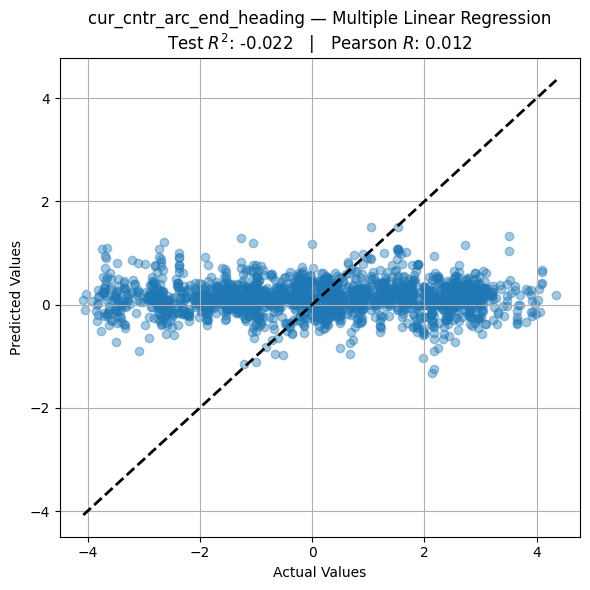

y_var_column: angle_opt_arc_from_cur_end_to_nxt

--- Multiple Linear Regression: angle_opt_arc_from_cur_end_to_nxt ---
R-squared (train):        0.0372
Adjusted R-squared:       0.0148
R-squared (test):         -0.0828
Pearson Corr (test):      -0.0546
MAE (test):               0.3811
MSE (test):               0.2315
RMSE (test):              0.4811


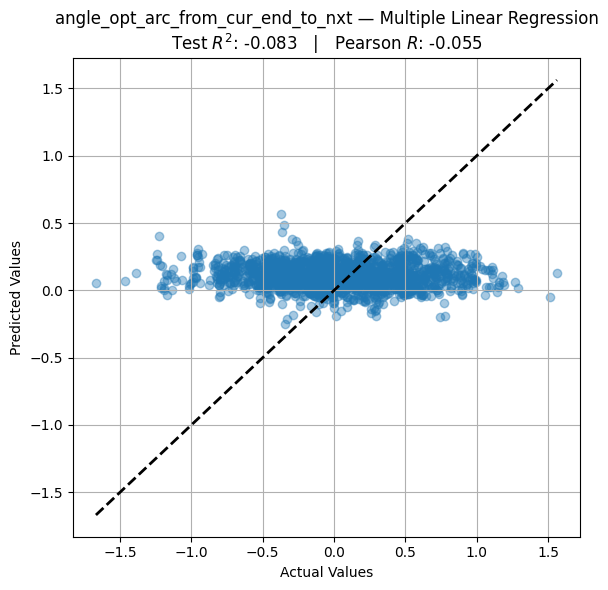

y_var_column: angle_cntr_arc_from_cur_end_to_nxt

--- Multiple Linear Regression: angle_cntr_arc_from_cur_end_to_nxt ---
R-squared (train):        0.0308
Adjusted R-squared:       0.0082
R-squared (test):         -0.0389
Pearson Corr (test):      -0.0054
MAE (test):               0.5106
MSE (test):               0.4291
RMSE (test):              0.6550


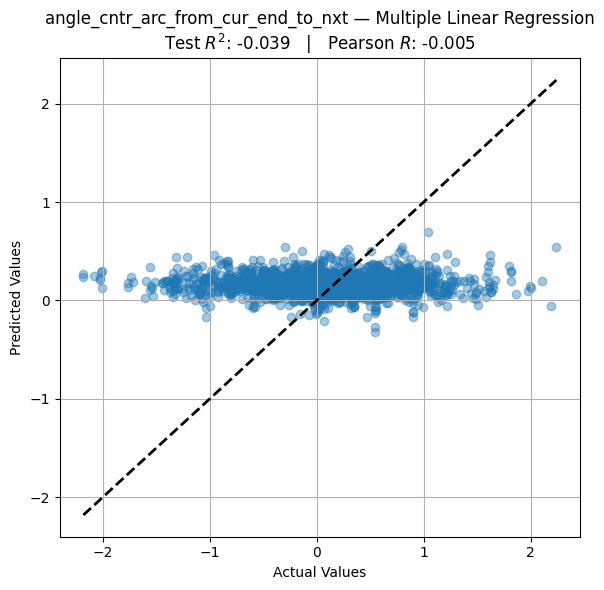

y_var_column: cur_ff_rel_x

--- Multiple Linear Regression: cur_ff_rel_x ---
R-squared (train):        0.0469
Adjusted R-squared:       0.0247
R-squared (test):         -0.0426
Pearson Corr (test):      0.0320
MAE (test):               24.3132
MSE (test):               1357.7889
RMSE (test):              36.8482


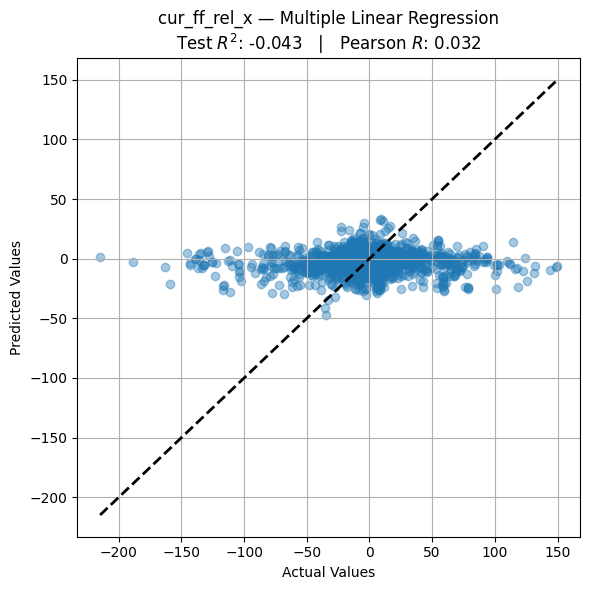

y_var_column: cur_ff_rel_y

--- Multiple Linear Regression: cur_ff_rel_y ---
R-squared (train):        0.1723
Adjusted R-squared:       0.1530
R-squared (test):         0.1203
Pearson Corr (test):      0.3669
MAE (test):               63.3145
MSE (test):               6093.0993
RMSE (test):              78.0583


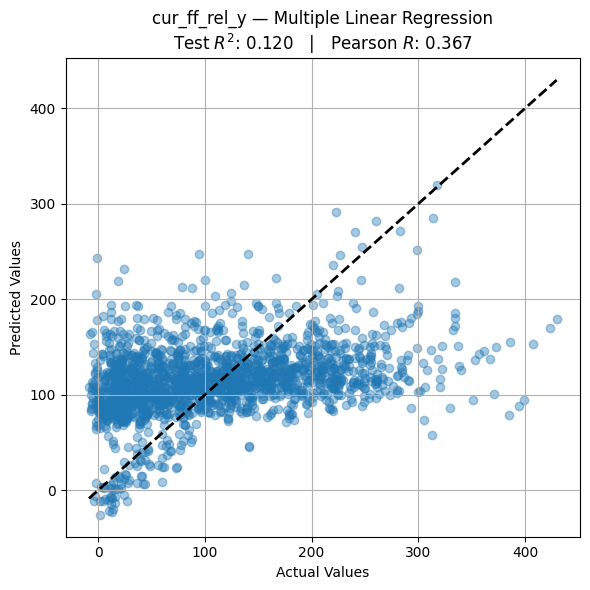

y_var_column: traj_curv

--- Multiple Linear Regression: traj_curv ---
R-squared (train):        0.0671
Adjusted R-squared:       0.0454
R-squared (test):         0.0160
Pearson Corr (test):      0.1672
MAE (test):               0.0025
MSE (test):               0.0000
RMSE (test):              0.0035


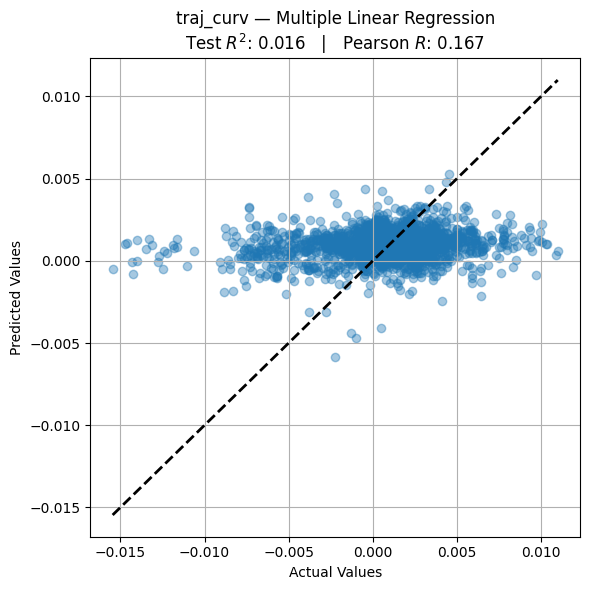

y_var_column: angle_from_m_before_stop_to_cur_ff

--- Multiple Linear Regression: angle_from_m_before_stop_to_cur_ff ---
R-squared (train):        0.0302
Adjusted R-squared:       0.0076
R-squared (test):         -0.0268
Pearson Corr (test):      -0.0057
MAE (test):               1.5311
MSE (test):               3.3487
RMSE (test):              1.8299


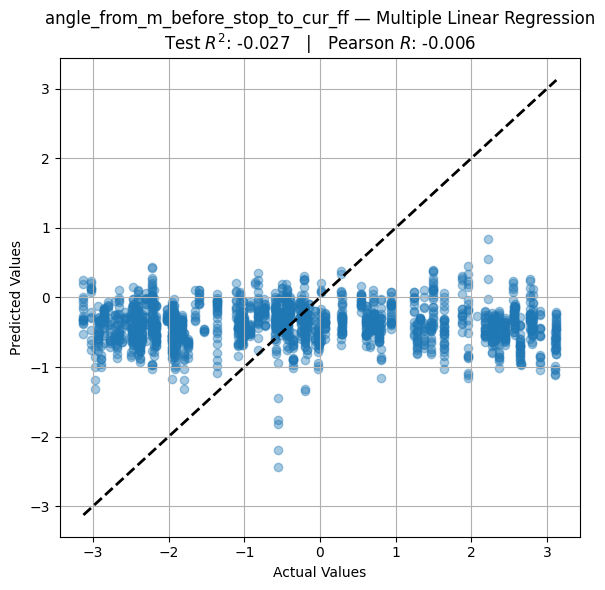

y_var_column: dir_from_cur_ff_to_stop


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[  72  619]
 [ 105 1068]]
Accuracy: 0.6115879828326181
y_var_column: dir_from_cur_ff_to_nxt_ff


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[ 85 879]
 [ 69 831]]
Accuracy: 0.49141630901287553
y_var_column: dir_from_cur_ff_same_side


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[105 682]
 [165 912]]
Accuracy: 0.5456008583690987
y_var_column: angle_from_cur_ff_to_stop

--- Multiple Linear Regression: angle_from_cur_ff_to_stop ---
R-squared (train):        0.0312
Adjusted R-squared:       0.0086
R-squared (test):         -0.0351
Pearson Corr (test):      0.0556
MAE (test):               1.5175
MSE (test):               3.1607
RMSE (test):              1.7778


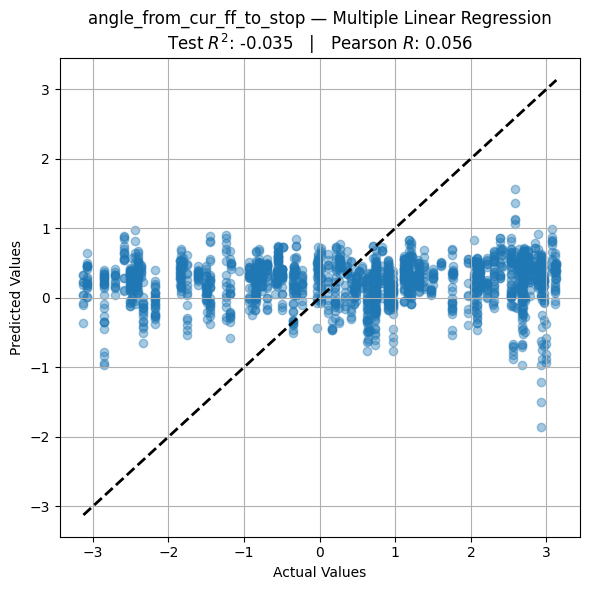

y_var_column: angle_from_cur_ff_to_nxt_ff

--- Multiple Linear Regression: angle_from_cur_ff_to_nxt_ff ---
R-squared (train):        0.0241
Adjusted R-squared:       0.0014
R-squared (test):         -0.0573
Pearson Corr (test):      -0.0285
MAE (test):               0.3286
MSE (test):               0.1706
RMSE (test):              0.4130


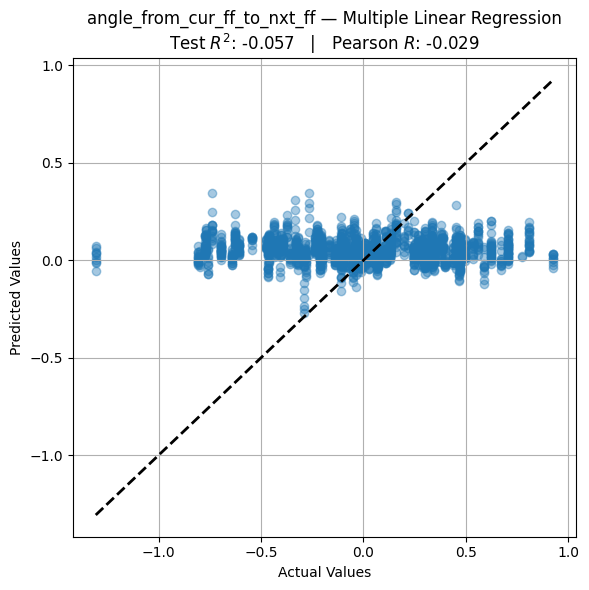

y_var_column: cur_ff_distance_at_ref

--- Multiple Linear Regression: cur_ff_distance_at_ref ---
R-squared (train):        0.0319
Adjusted R-squared:       0.0094
R-squared (test):         -0.0223
Pearson Corr (test):      0.0169
MAE (test):               60.0711
MSE (test):               5278.1378
RMSE (test):              72.6508


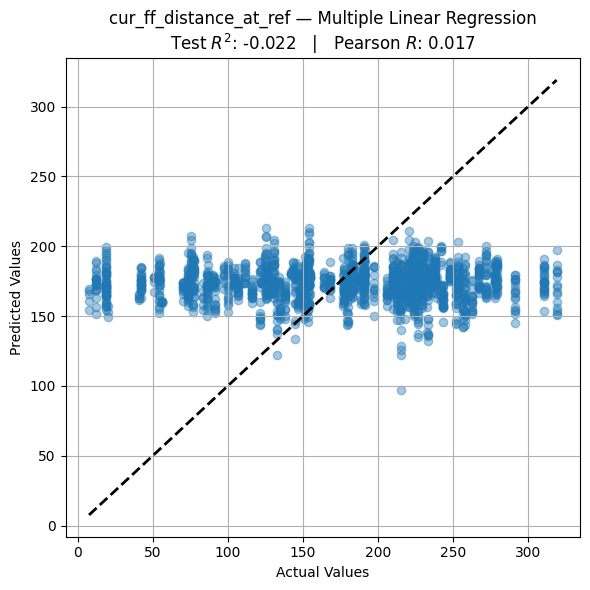

y_var_column: cur_ff_angle_at_ref

--- Multiple Linear Regression: cur_ff_angle_at_ref ---
R-squared (train):        0.0472
Adjusted R-squared:       0.0250
R-squared (test):         -0.0408
Pearson Corr (test):      0.0452
MAE (test):               0.2615
MSE (test):               0.1076
RMSE (test):              0.3280


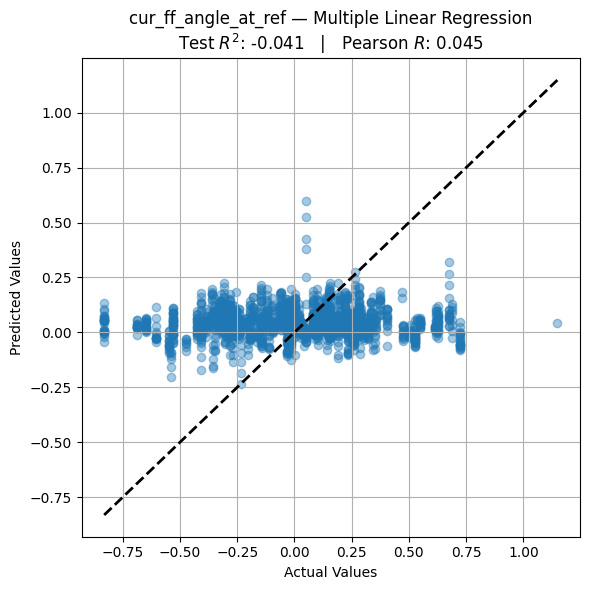

y_var_column: cur_ff_angle_boundary_at_ref

--- Multiple Linear Regression: cur_ff_angle_boundary_at_ref ---
R-squared (train):        0.0454
Adjusted R-squared:       0.0232
R-squared (test):         -0.0463
Pearson Corr (test):      0.0130
MAE (test):               0.1939
MSE (test):               0.0679
RMSE (test):              0.2605


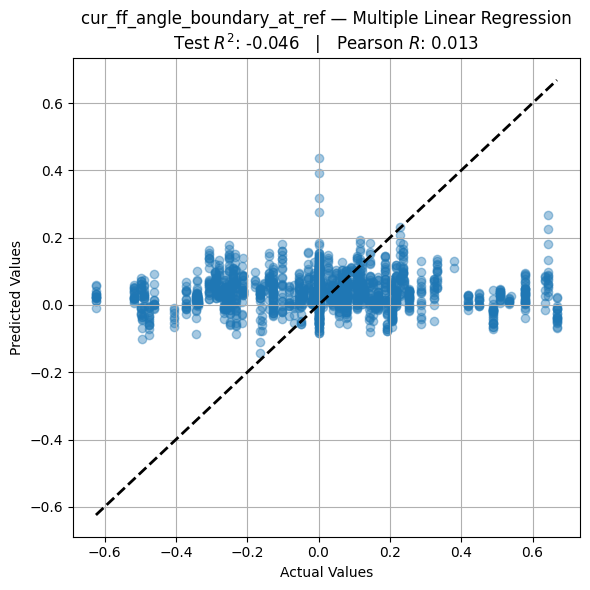

y_var_column: curv_range

--- Multiple Linear Regression: curv_range ---
R-squared (train):        0.0253
Adjusted R-squared:       0.0026
R-squared (test):         -0.0044
Pearson Corr (test):      0.0610
MAE (test):               22.5559
MSE (test):               1174.7888
RMSE (test):              34.2752


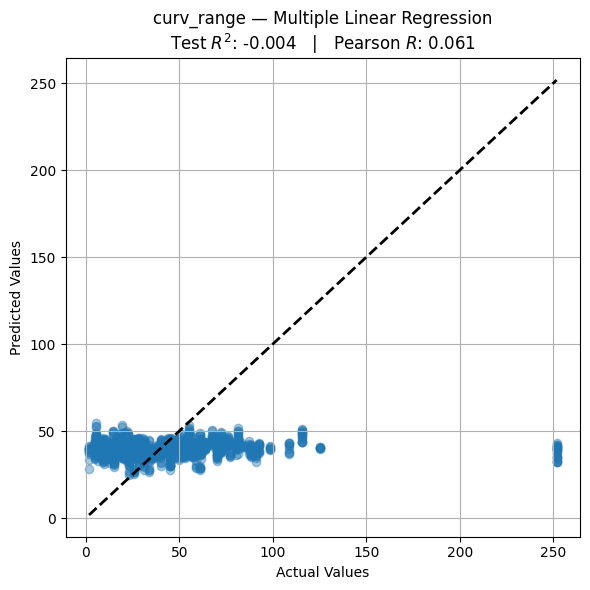

y_var_column: curv_iqr

--- Multiple Linear Regression: curv_iqr ---
R-squared (train):        0.0223
Adjusted R-squared:       -0.0004
R-squared (test):         -0.0184
Pearson Corr (test):      0.0246
MAE (test):               13.8950
MSE (test):               769.4618
RMSE (test):              27.7392


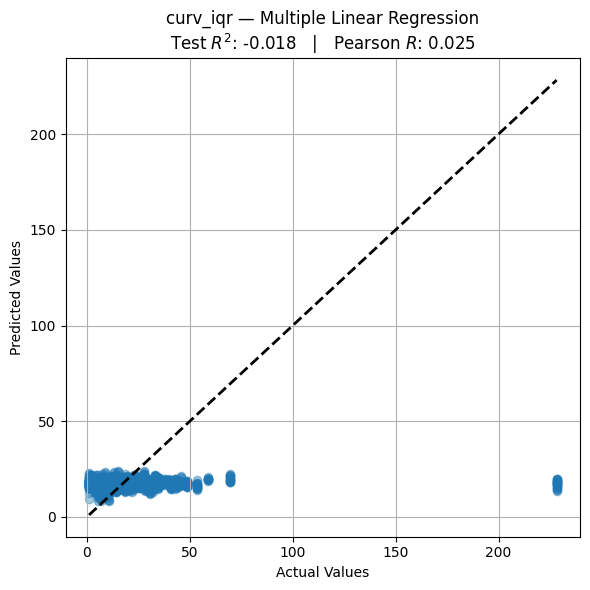

y_var_column: cur_ff_cluster_50_size

--- Multiple Linear Regression: cur_ff_cluster_50_size ---
R-squared (train):        0.0274
Adjusted R-squared:       0.0047
R-squared (test):         -0.0755
Pearson Corr (test):      0.1243
MAE (test):               0.5009
MSE (test):               0.3069
RMSE (test):              0.5540


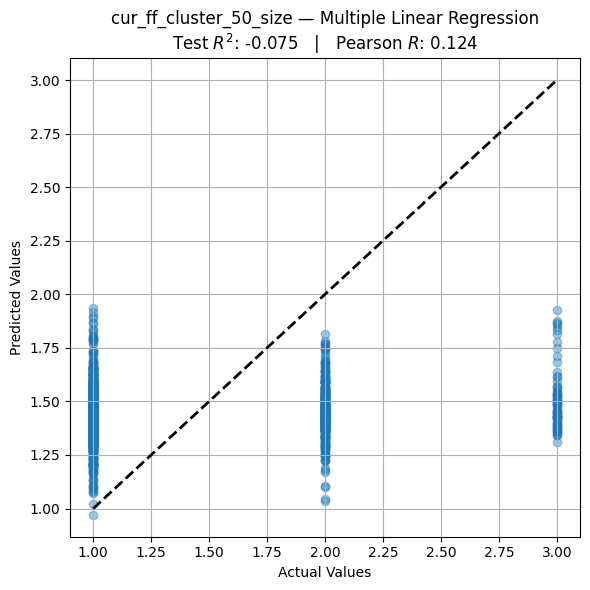

y_var_column: rel_cur_ff_last_seen_time_bbas

--- Multiple Linear Regression: rel_cur_ff_last_seen_time_bbas ---
R-squared (train):        0.0834
Adjusted R-squared:       0.0621
R-squared (test):         -0.0543
Pearson Corr (test):      0.1490
MAE (test):               0.5010
MSE (test):               0.3362
RMSE (test):              0.5798


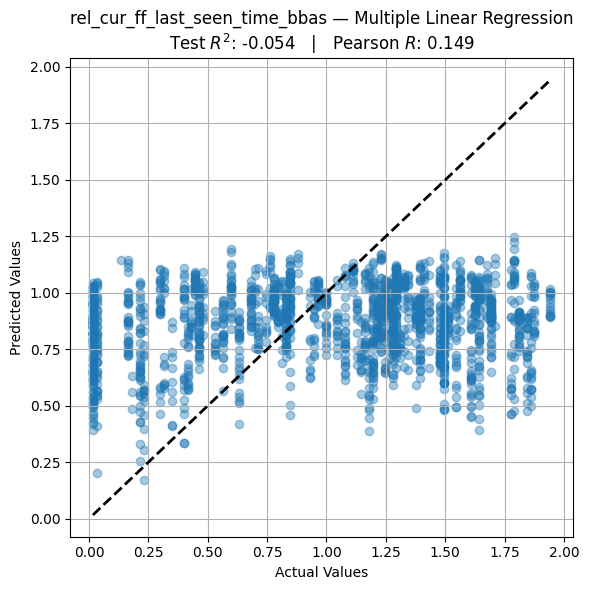

y_var_column: rel_cur_ff_first_seen_time_bbas

--- Multiple Linear Regression: rel_cur_ff_first_seen_time_bbas ---
R-squared (train):        0.0390
Adjusted R-squared:       0.0167
R-squared (test):         -0.0329
Pearson Corr (test):      0.0427
MAE (test):               0.3740
MSE (test):               0.2086
RMSE (test):              0.4567


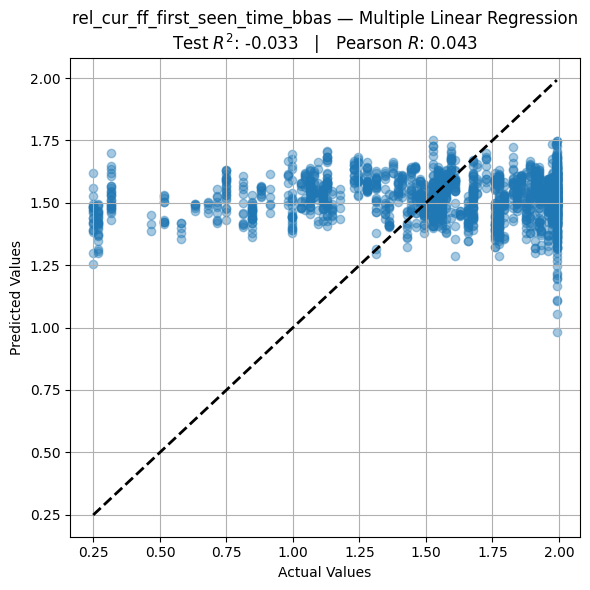

y_var_column: current_target_caught_time

--- Multiple Linear Regression: current_target_caught_time ---
R-squared (train):        0.9966
Adjusted R-squared:       0.9965
R-squared (test):         0.9963
Pearson Corr (test):      0.9982
MAE (test):               53.2447
MSE (test):               3987.7089
RMSE (test):              63.1483


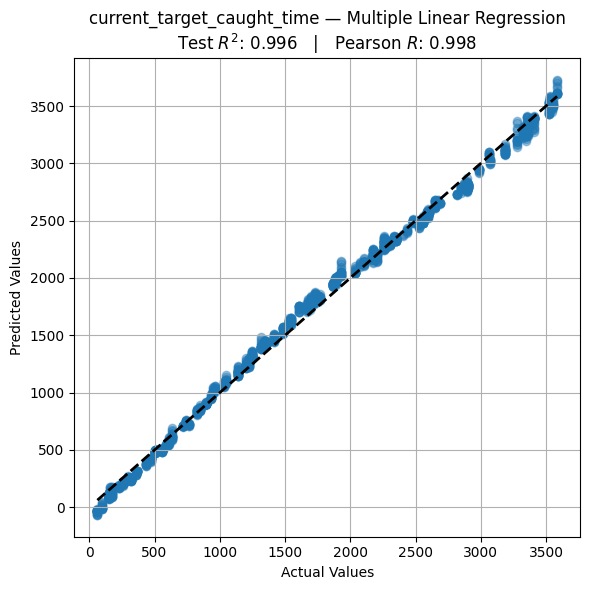

In [ ]:
x_var, y_var = pn.get_x_and_y_var_for_lr(test_or_control='both', use_x_var_lags=True)
ml_methods_utils.run_segment_split_regression(x_var, y_var, columns_of_interest, segment_column='segment')

## random split

y_var_column: nxt_cntr_arc_curv

--- Multiple Linear Regression: nxt_cntr_arc_curv ---
R-squared (train):        0.0384
Adjusted R-squared:       0.0157
R-squared (test):         -0.0120
Pearson Corr (test):      0.0683
MAE (test):               0.0020
MSE (test):               0.0000
RMSE (test):              0.0029


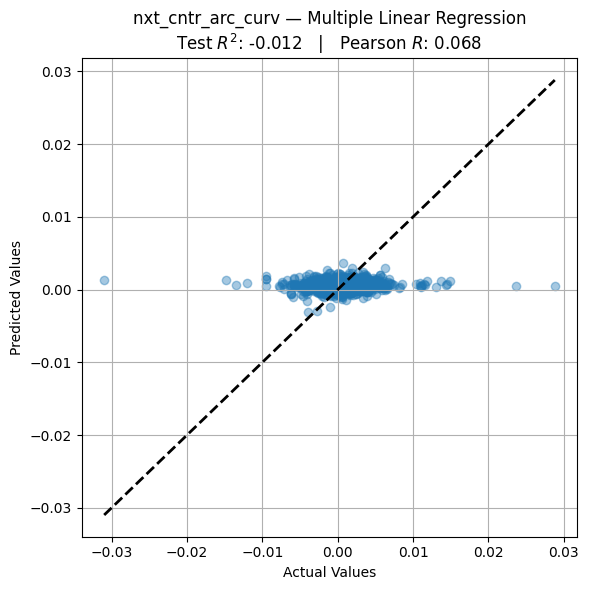

y_var_column: nxt_opt_arc_curv

--- Multiple Linear Regression: nxt_opt_arc_curv ---
R-squared (train):        0.0375
Adjusted R-squared:       0.0149
R-squared (test):         -0.0000
Pearson Corr (test):      0.0915
MAE (test):               0.0018
MSE (test):               0.0000
RMSE (test):              0.0023


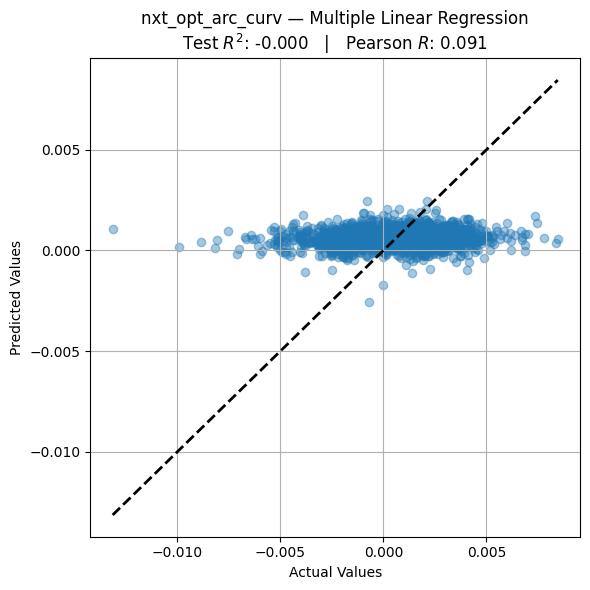

y_var_column: nxt_opt_arc_dheading

--- Multiple Linear Regression: nxt_opt_arc_dheading ---
R-squared (train):        0.0375
Adjusted R-squared:       0.0148
R-squared (test):         -0.0044
Pearson Corr (test):      0.0831
MAE (test):               0.5411
MSE (test):               0.4644
RMSE (test):              0.6815


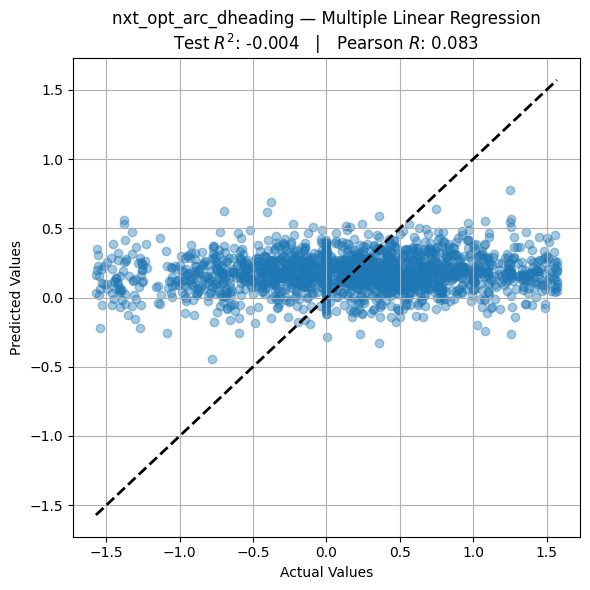

y_var_column: nxt_ff_angle

--- Multiple Linear Regression: nxt_ff_angle ---
R-squared (train):        0.0396
Adjusted R-squared:       0.0170
R-squared (test):         -0.0094
Pearson Corr (test):      0.0903
MAE (test):               0.2827
MSE (test):               0.1227
RMSE (test):              0.3504


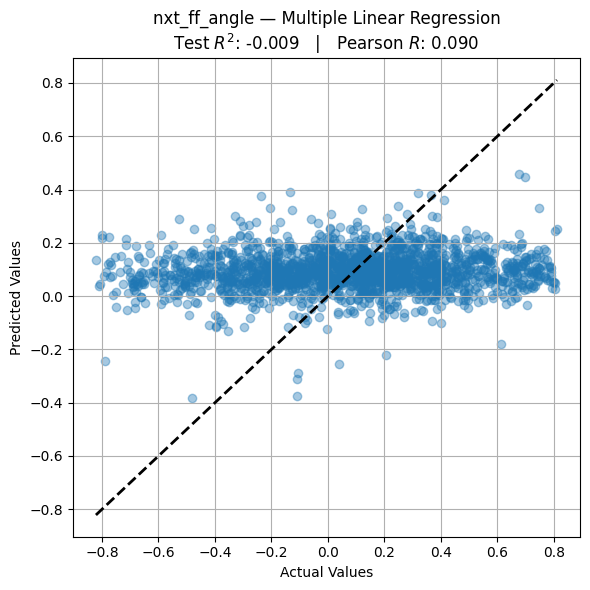

y_var_column: nxt_ff_index

--- Multiple Linear Regression: nxt_ff_index ---
R-squared (train):        0.9997
Adjusted R-squared:       0.9997
R-squared (test):         0.9997
Pearson Corr (test):      0.9999
MAE (test):               5.3007
MSE (test):               44.8163
RMSE (test):              6.6945


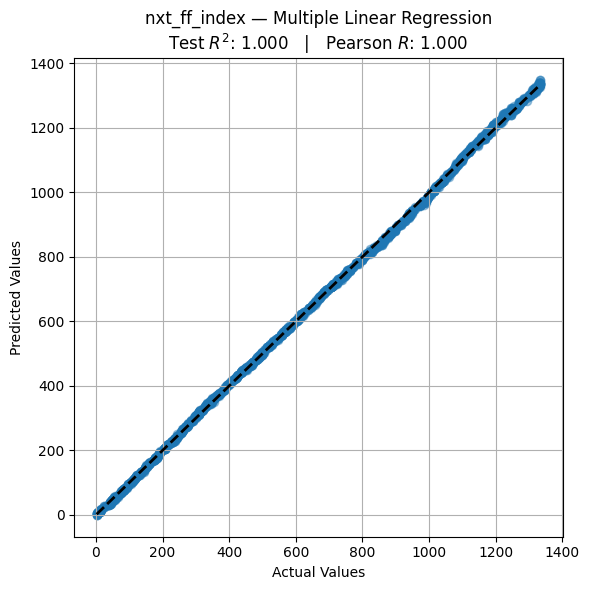

y_var_column: nxt_ff_distance

--- Multiple Linear Regression: nxt_ff_distance ---
R-squared (train):        0.0962
Adjusted R-squared:       0.0749
R-squared (test):         0.0343
Pearson Corr (test):      0.2112
MAE (test):               109.5613
MSE (test):               18037.0097
RMSE (test):              134.3019


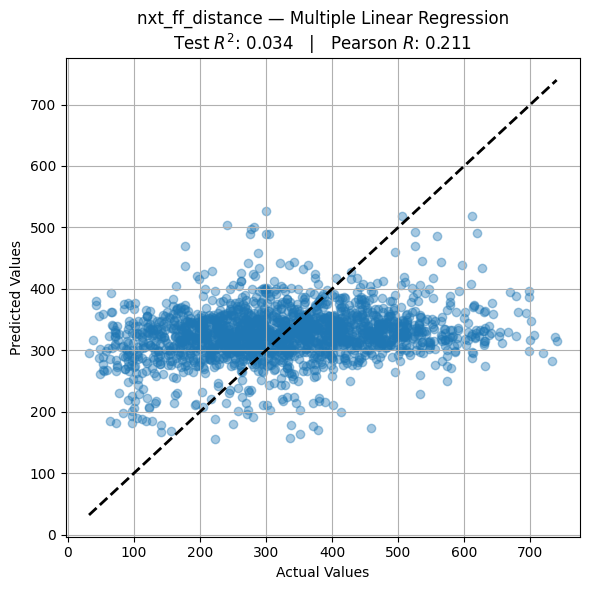

y_var_column: angle_opt_arc_from_cur_end_to_nxt

--- Multiple Linear Regression: angle_opt_arc_from_cur_end_to_nxt ---
R-squared (train):        0.0353
Adjusted R-squared:       0.0128
R-squared (test):         -0.0130
Pearson Corr (test):      0.0646
MAE (test):               0.3640
MSE (test):               0.2181
RMSE (test):              0.4670


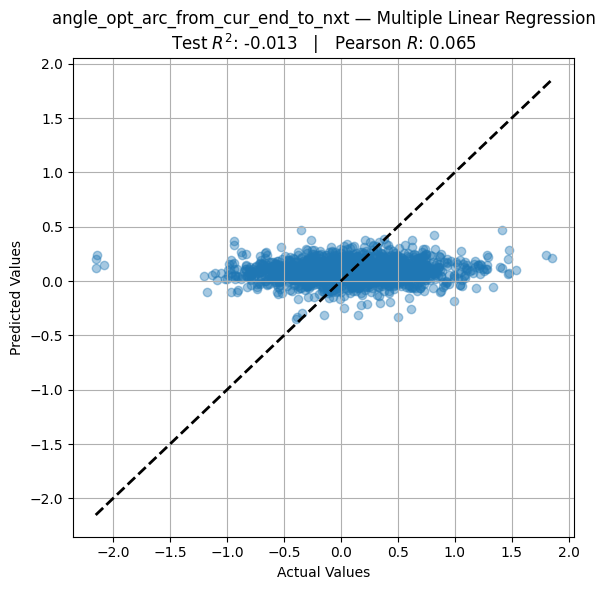

y_var_column: angle_cntr_arc_from_cur_end_to_nxt

--- Multiple Linear Regression: angle_cntr_arc_from_cur_end_to_nxt ---
R-squared (train):        0.0320
Adjusted R-squared:       0.0091
R-squared (test):         -0.0226
Pearson Corr (test):      0.0400
MAE (test):               0.4780
MSE (test):               0.3766
RMSE (test):              0.6137


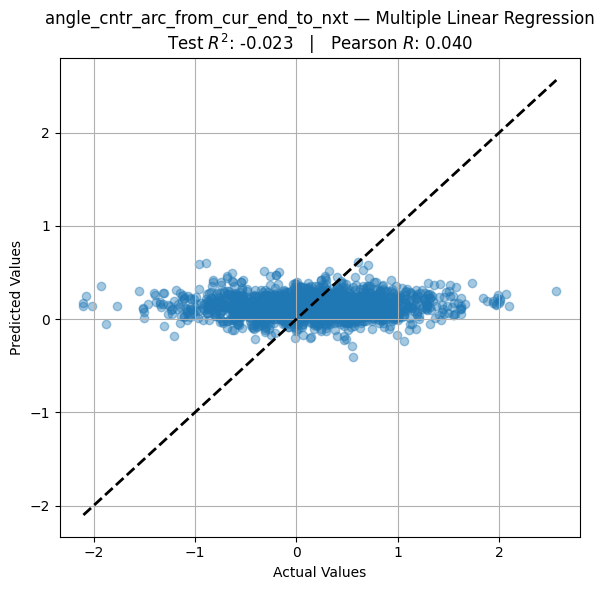

y_var_column: nxt_ff_rel_x

--- Multiple Linear Regression: nxt_ff_rel_x ---
R-squared (train):        0.0418
Adjusted R-squared:       0.0191
R-squared (test):         -0.0193
Pearson Corr (test):      0.0511
MAE (test):               94.4573
MSE (test):               15452.7219
RMSE (test):              124.3090


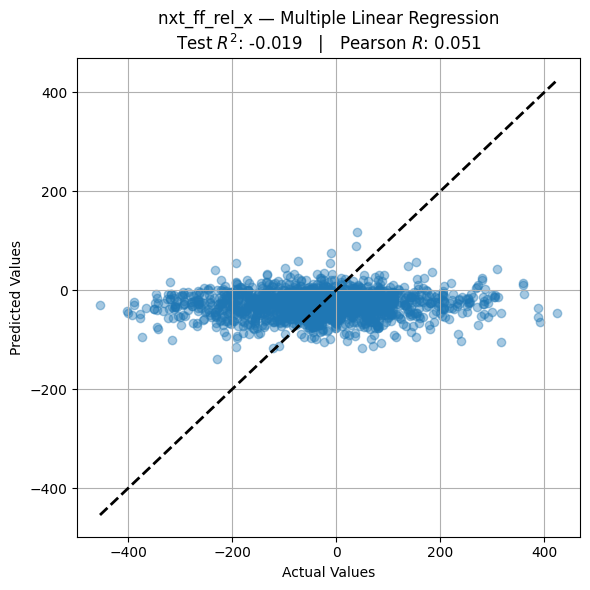

y_var_column: nxt_ff_rel_y

--- Multiple Linear Regression: nxt_ff_rel_y ---
R-squared (train):        0.0925
Adjusted R-squared:       0.0711
R-squared (test):         0.0312
Pearson Corr (test):      0.2043
MAE (test):               100.8837
MSE (test):               15658.0639
RMSE (test):              125.1322


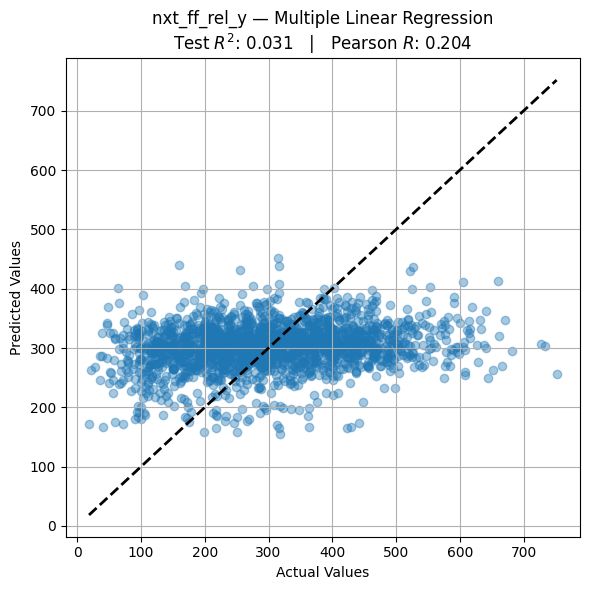

y_var_column: angle_from_m_before_stop_to_nxt_ff

--- Multiple Linear Regression: angle_from_m_before_stop_to_nxt_ff ---
R-squared (train):        0.0257
Adjusted R-squared:       0.0027
R-squared (test):         -0.0161
Pearson Corr (test):      0.0202
MAE (test):               0.3100
MSE (test):               0.1524
RMSE (test):              0.3903


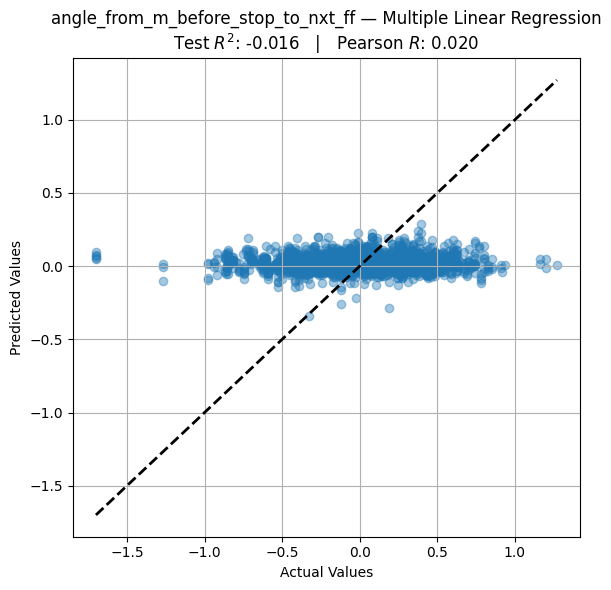

y_var_column: dir_from_cur_ff_to_nxt_ff

--- Multiple Linear Regression: dir_from_cur_ff_to_nxt_ff ---
R-squared (train):        0.0305
Adjusted R-squared:       0.0076
R-squared (test):         -0.0250
Pearson Corr (test):      0.0299
MAE (test):               0.9811
MSE (test):               1.0101
RMSE (test):              1.0050


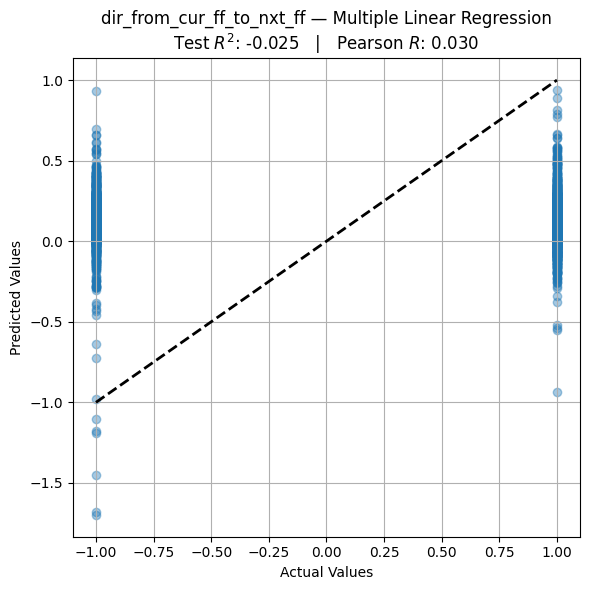

y_var_column: angle_from_cur_ff_to_nxt_ff

--- Multiple Linear Regression: angle_from_cur_ff_to_nxt_ff ---
R-squared (train):        0.0275
Adjusted R-squared:       0.0047
R-squared (test):         -0.0293
Pearson Corr (test):      0.0053
MAE (test):               0.3220
MSE (test):               0.1614
RMSE (test):              0.4017


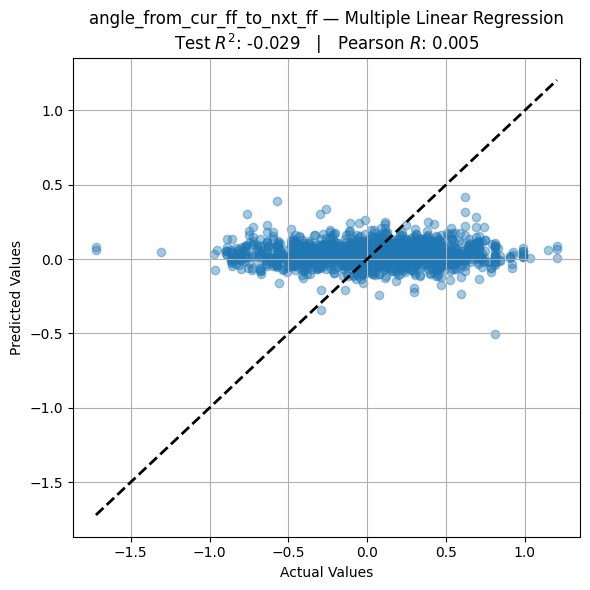

y_var_column: nxt_ff_distance_at_ref

--- Multiple Linear Regression: nxt_ff_distance_at_ref ---
R-squared (train):        0.0389
Adjusted R-squared:       0.0162
R-squared (test):         -0.0029
Pearson Corr (test):      0.0871
MAE (test):               104.7784
MSE (test):               16845.4287
RMSE (test):              129.7899


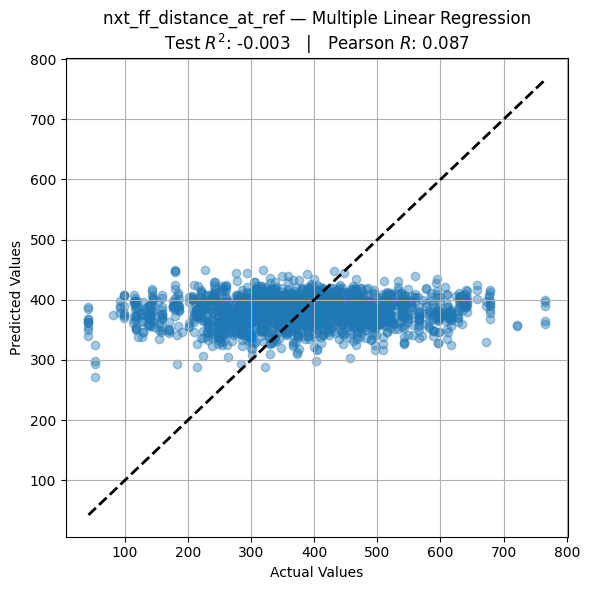

y_var_column: nxt_ff_angle_at_ref

--- Multiple Linear Regression: nxt_ff_angle_at_ref ---
R-squared (train):        0.0360
Adjusted R-squared:       0.0134
R-squared (test):         -0.0156
Pearson Corr (test):      0.0551
MAE (test):               0.3335
MSE (test):               0.1747
RMSE (test):              0.4179


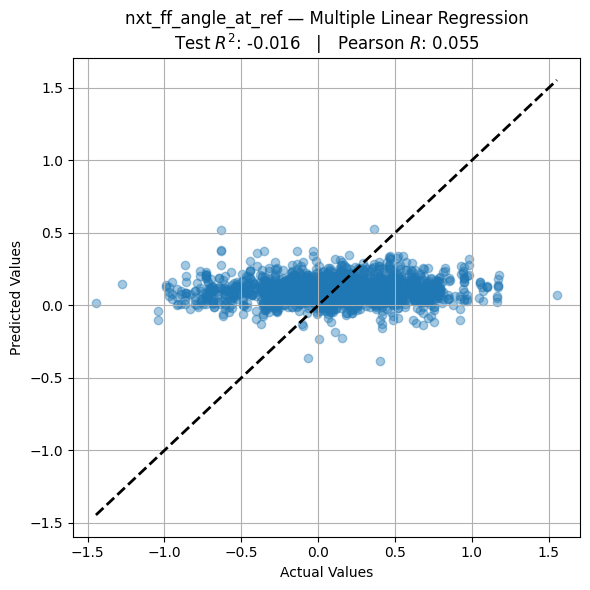

In [ ]:
x_var, y_var = pn.get_x_and_y_var_for_lr(test_or_control='both', use_x_var_lags=True)

columns_of_interest = [col for col in pn.y_var.columns if 'nxt' in col]

ml_inst = ml_methods_class.MlMethods()
for y_var_column in columns_of_interest:
    print('y_var_column:', y_var_column)
    ml_inst.split_and_use_linear_regression(pn.x_var_lags_reduced, pn.y_var[[y_var_column]])


# CCA

https://medium.com/@pozdrawiamzuzanna/canonical-correlation-analysis-simple-explanation-and-python-example-a5b8e97648d2

## conduct cca

Training CCA, kernel = None, regularization = 0.0000, 10 components
Canonical Correlation Per Component Pair: [0.60667 0.57146 0.53605 0.5139  0.46176 0.41564 0.39979 0.3584  0.35677
 0.33963]
% Shared Variance: [0.36804 0.32657 0.28735 0.26409 0.21322 0.17276 0.15983 0.12845 0.12729
 0.11535]


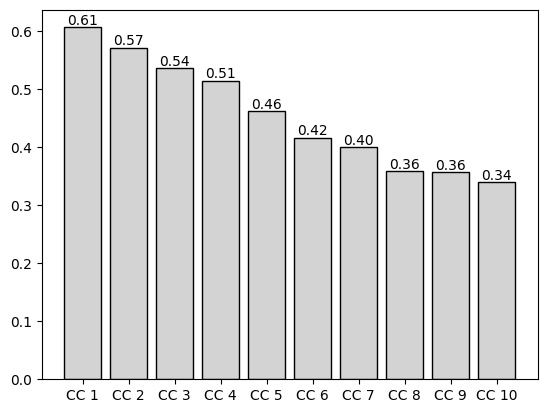

Training CCA, kernel = None, regularization = 0.0000, 10 components
Canonical Correlation Per Component Pair: [0.93561 0.91401 0.90682 0.8979  0.89193 0.88222 0.87709 0.86996 0.8674
 0.86272]
% Shared Variance: [0.87537 0.83542 0.82232 0.80622 0.79554 0.77831 0.76928 0.75682 0.75238
 0.74429]


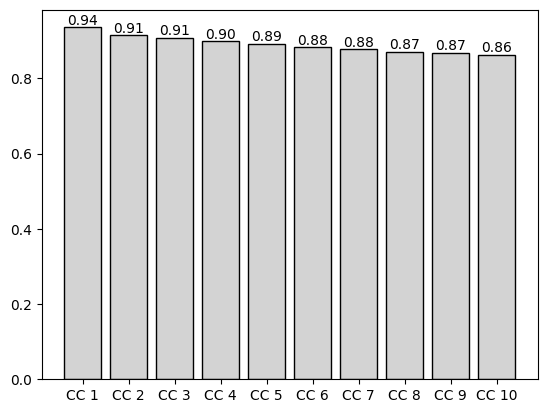

pn.x_var_lags.shape: (2777, 959)
pn.y_var_lags_reduced.shape: (2777, 303)


In [41]:
# If error occurs, try reducing y_var again, and can also try pn.y_var_reduced.corr()[pn.y_var_reduced.corr() > 0.9]

x_var_reduced = pn.x_var_reduced[[col for col in pn.x_var_reduced.columns if col.startswith('cluster_')]]
cca_no_lag = cca_class.CCAclass(X1=x_var_reduced.drop(columns=['bin', 'segment'], errors='ignore'), 
                                X2=pn.y_var_reduced.drop(columns=['bin', 'segment'], errors='ignore'), 
                                lagging_included=False)
cca_no_lag.conduct_cca()

x_var_lags_reduced = pn.x_var_lags_reduced[[col for col in pn.x_var_lags_reduced.columns if col.startswith('cluster_')]]
cca_lags = cca_class.CCAclass(X1=x_var_lags_reduced.drop(columns=['bin', 'segment'], errors='ignore'), 
                              X2=pn.y_var_lags_reduced.drop(columns=['bin', 'segment'], errors='ignore'), 
                              lagging_included=True)
# for all columns that end with _0, rename them to the column name without the _0
cca_lags.X2.columns = cca_lags.X2.columns.str.replace('_0', '')
cca_lags.conduct_cca()


print(f'pn.x_var_lags.shape: {pn.x_var_lags.shape}')
print(f'pn.y_var_lags_reduced.shape: {pn.y_var_lags_reduced.shape}')

cca_inst = cca_lags

## compare lag vs no lag

In [ ]:
can_load_df = pd.DataFrame(cca_no_lag.canon_corr, columns = ['no_lag'])
can_load_df[f'with_lags'] = cca_lags.canon_corr
can_load_df['component'] = [f'CC {i+1}' for i in range(cca_lags.n_components)]
# convert can_load_df to long format
can_load_df_long = pd.melt(can_load_df, id_vars=['component'], var_name='lag', value_name='canon_coeff')

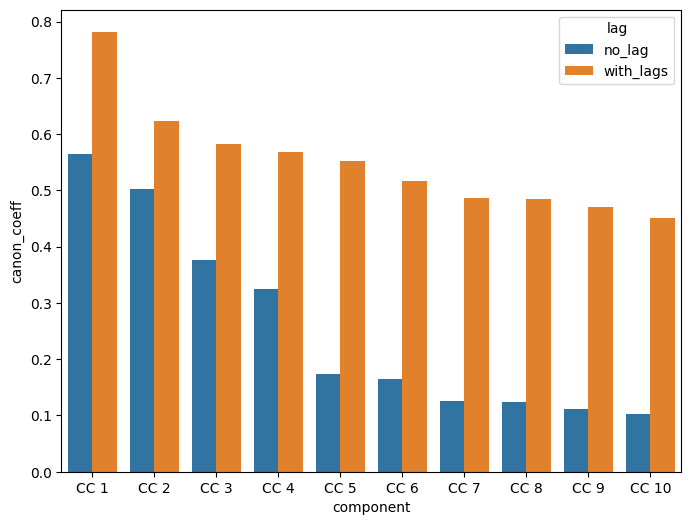

In [ ]:
# make a sns bar plot on can_load_df_long
plt.figure(figsize=(8, 6))
sns.barplot(x='component', y='canon_coeff', data=can_load_df_long, hue='lag')
plt.show()

## cca_inst (choose one between lags and no lag)

In [ ]:
# choose no lag
cca_inst = cca_no_lag

In [ ]:
# choose lags
cca_inst = cca_lags

## test for p values

In [ ]:
cca_inst.test_for_p_values()

                               Cancorr results
    Canonical Correlation Wilks' lambda   Num DF      Den DF    F Value Pr > F
------------------------------------------------------------------------------
0                  0.7821        0.0001 41536.0000 1318675.7109  2.1510 0.0000
1                  0.6238        0.0002 41125.0000 1311961.6497  1.9442 0.0000
2                  0.5830        0.0004 40716.0000 1305244.6373  1.8443 0.0000
3                  0.5676        0.0006 40309.0000 1298524.6462  1.7616 0.0000
4                  0.5517        0.0009 39904.0000 1291801.6486  1.6839 0.0000
5                  0.5164        0.0013 39501.0000 1285075.6160  1.6111 0.0000
6                  0.4873        0.0018 39100.0000 1278346.5195  1.5502 0.0000
7                  0.4841        0.0023 38701.0000 1271614.3296  1.4980 0.0000
8                  0.4708        0.0030 38304.0000 1264879.0162  1.4457 0.0000
9                  0.4509        0.0039 37909.0000 1258140.5487  1.3965 0.0000
10   

# Heatmap of loadings

## X1 loadings

In [ ]:
# cca_inst.plot_X1_loadings()

## X2 loadings

In [ ]:
reload(ml_plotting_utils)
reload(cca_plotting)
reload(cca_class)

<module 'neural_data_analysis.neural_analysis_tools.cca_methods.cca_class' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/neural_data_analysis/neural_analysis_tools/cca_methods/cca_class.py'>

In [ ]:
pn.y_var_lags_reduced.columns

Index(['LDz_-1', 'LDz_-3', 'LDz_-5', 'LDz_3', 'LDz_5', 'RDz_-2', 'RDz_-4',
       'RDz_-5', 'RDz_0', 'RDz_1',
       ...
       'whether_new_distinct_stop_3', 'whether_new_distinct_stop_4',
       'whether_new_distinct_stop_5', 'whether_test_0',
       'while_last_seeing_target_cluster_-1',
       'while_last_seeing_target_cluster_-3',
       'while_last_seeing_target_cluster_-5',
       'while_last_seeing_target_cluster_1',
       'while_last_seeing_target_cluster_3',
       'while_last_seeing_target_cluster_5'],
      dtype='object', length=237)

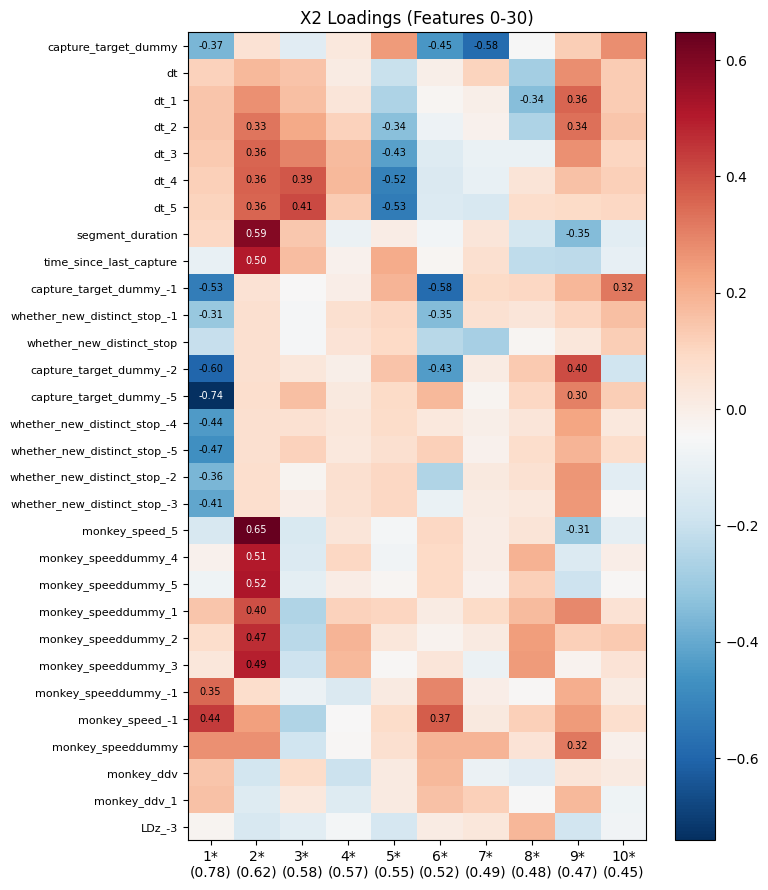

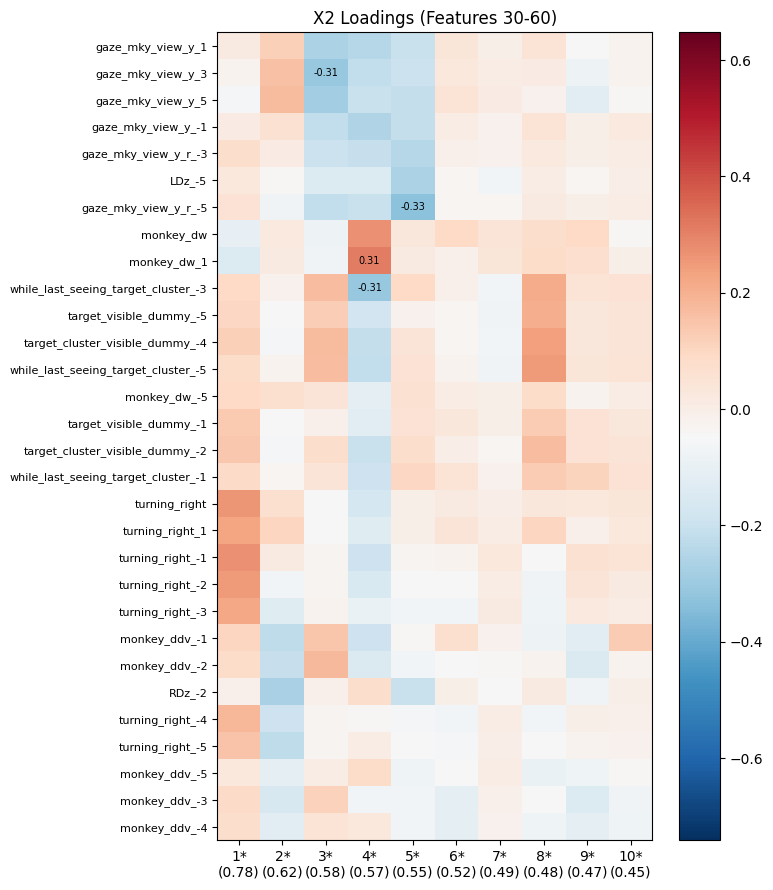

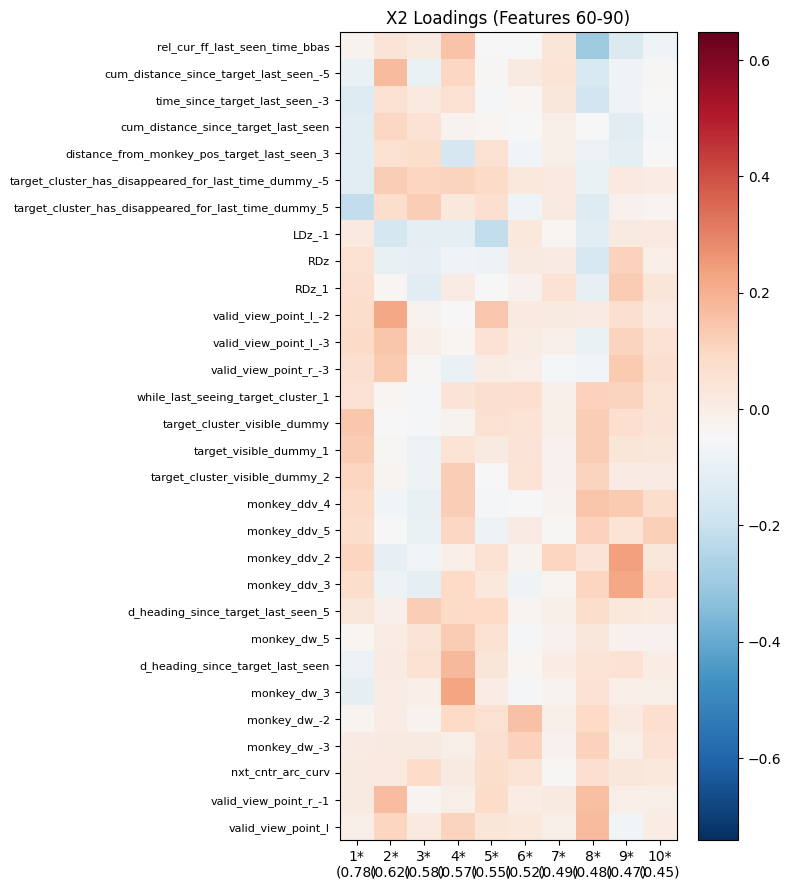

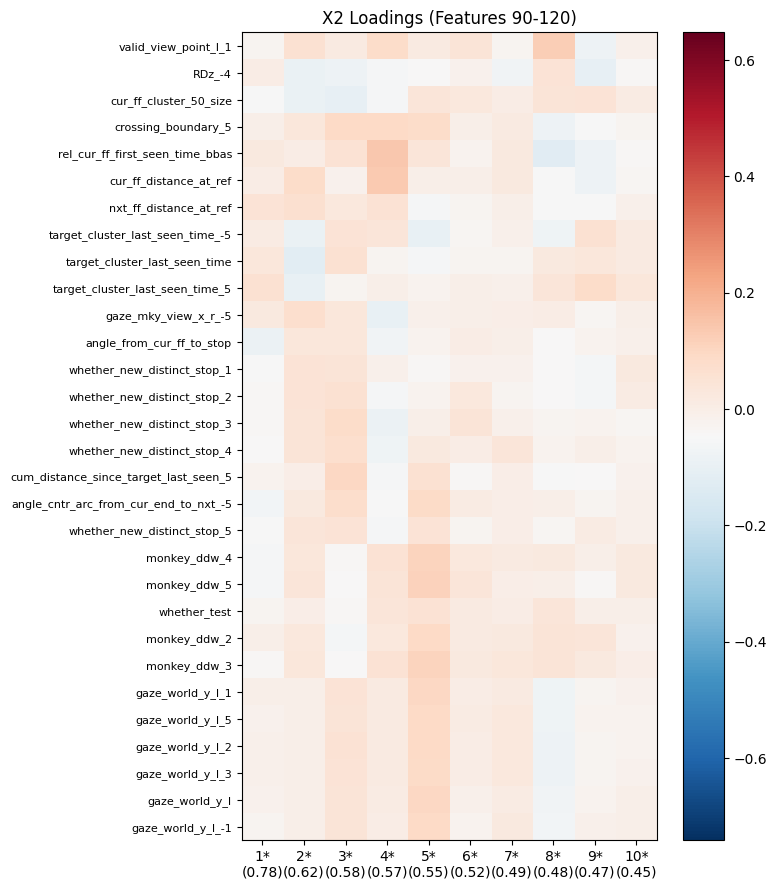

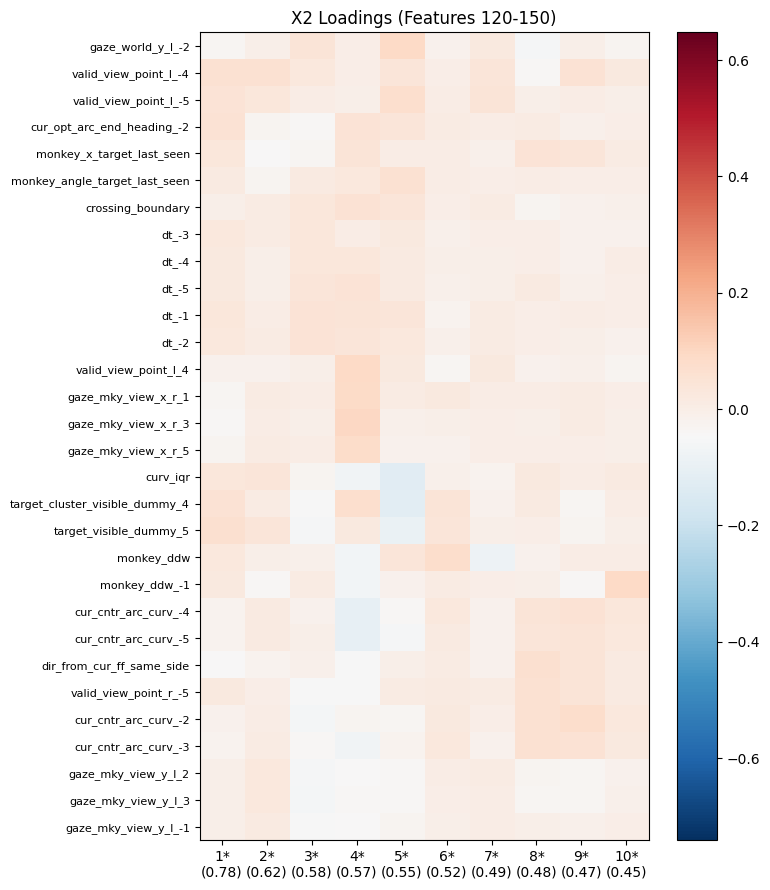

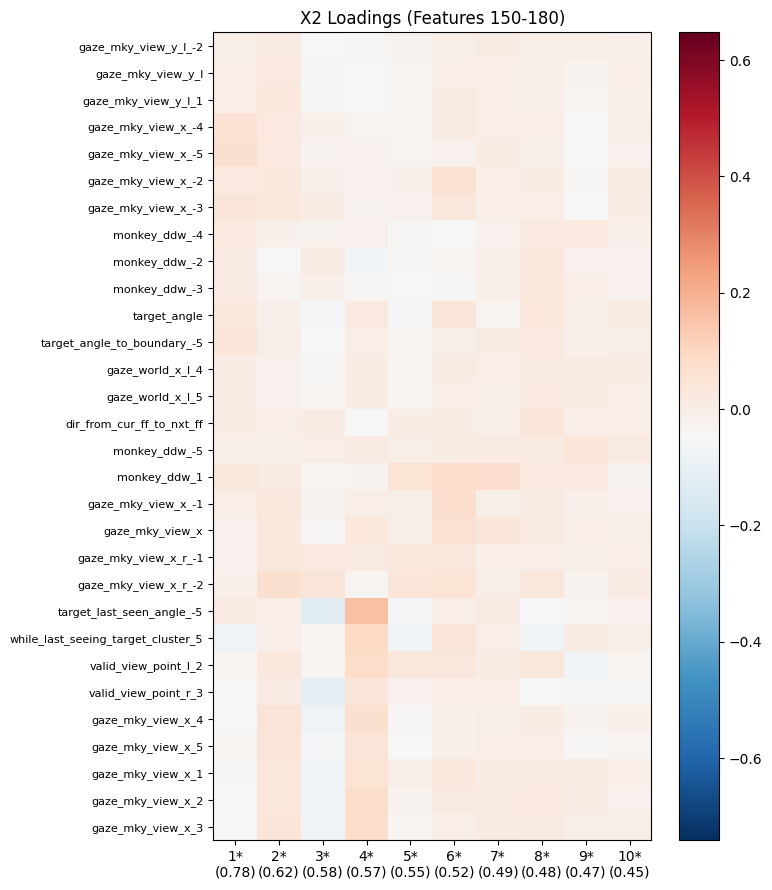

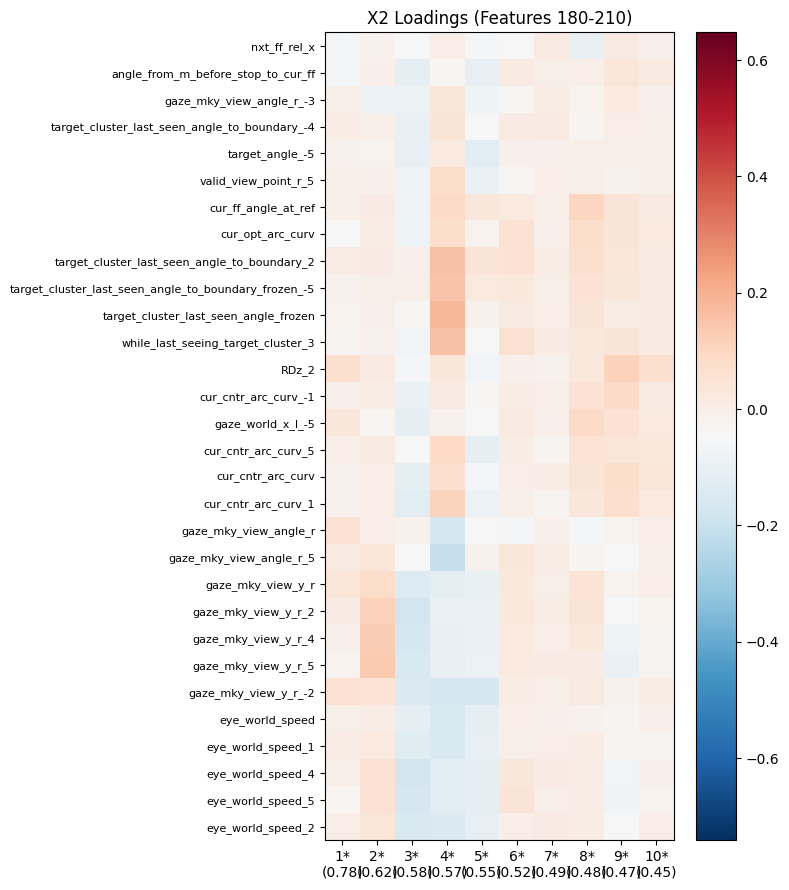

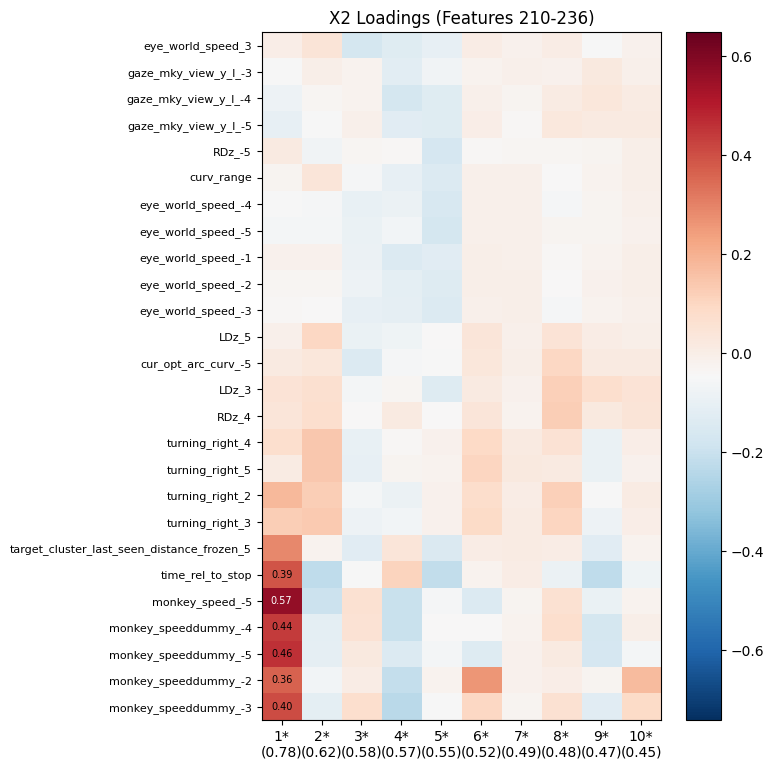

In [ ]:
cca_inst.plot_X2_loadings()

# Canonical Variate scatterplots

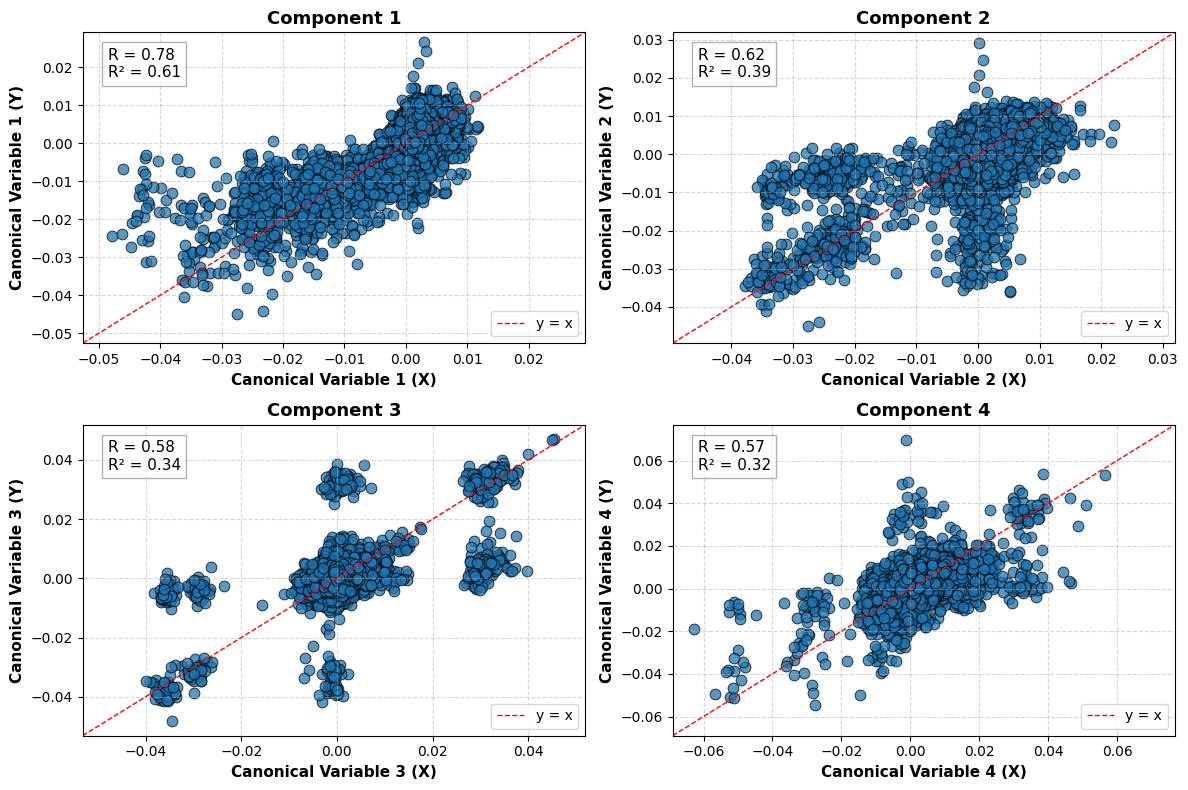

In [ ]:
components=range(1, 5)
cca_plotting.plot_cca_component_scatter(cca_inst.X1_c, cca_inst.X2_c, components=components, show_y_eq_x=True)


# Transform vars (e.g. use basis functions)

In [ ]:
cca_no_lag.X2_tf_df = transform_vars.transform_behav_data(cca_no_lag.X2)
cca_lags.X2_tf_df = transform_vars.transform_behav_data(cca_lags.X2)

Added smooth features: ['smooth_5_monkey_dw', 'smooth_5_target_rel_x', 'smooth_7_monkey_dw', 'smooth_7_target_rel_x']
Added gaussian_smooth features: ['gaussian_smooth_monkey_ddv']
Added log features: ['log_time_since_last_capture']
Added poly features: ['poly_p0_5_monkey_ddv', 'poly_p1_monkey_ddv', 'poly_p2_monkey_ddv', 'poly_p3_monkey_ddv']
Added smooth features: ['smooth_5_monkey_dw', 'smooth_7_monkey_dw']
Added gaussian_smooth features: ['gaussian_smooth_monkey_ddv']
Added log features: ['log_time_since_last_capture']
Added poly features: ['poly_p0_5_monkey_ddv', 'poly_p1_monkey_ddv', 'poly_p2_monkey_ddv', 'poly_p3_monkey_ddv']


In [ ]:
# If need to use the data
cca_inst = cca_lags
X1_df = cca_inst.X1_sc_df
X2_df = cca_inst.X2_tf_df


# Lags vs no lag & train vs test

## grouped by segment

In [42]:
combined_cross_view_df, combined_can_load_df = cca_cv_utils.combine_cca_cv_results(cca_no_lag, cca_lags, n_components=7, reg=0.1, n_splits=7,
                                                                               groups=pn.y_var['segment'].values
                                                                               )

Cross validation is conducted based on groups.
Training CCA, kernel = None, regularization = 0.1000, 7 components
Training CCA, kernel = None, regularization = 0.1000, 7 components
Training CCA, kernel = None, regularization = 0.1000, 7 components
Training CCA, kernel = None, regularization = 0.1000, 7 components


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Training CCA, kernel = None, regularization = 0.1000, 7 components
Training CCA, kernel = None, regularization = 0.1000, 7 components
Training CCA, kernel = None, regularization = 0.1000, 7 components
Cross validation is conducted based on groups.
Training CCA, kernel = None, regularization = 0.1000, 7 components
Training CCA, kernel = None, regularization = 0.1000, 7 components


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Training CCA, kernel = None, regularization = 0.1000, 7 components


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Training CCA, kernel = None, regularization = 0.1000, 7 components
Training CCA, kernel = None, regularization = 0.1000, 7 components
Training CCA, kernel = None, regularization = 0.1000, 7 components
Training CCA, kernel = None, regularization = 0.1000, 7 components


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


### cross-view X1

In [43]:
# dataset_name = 'X1'
# cross_view_sub = combined_cross_view_df[combined_cross_view_df['dataset'] == dataset_name]
# cca_plot_lag_vs_no_lag.plot_cca_lag_vs_nolag_and_train_vs_test(cross_view_sub, dataset_name, mode='lag_offset')


### cross-view X2

In [44]:
pn.y_var['segment_duration'].describe()

count   2777.00000
mean       2.37149
std        0.34439
min        0.46441
25%        2.50643
50%        2.50657
75%        2.50664
max        2.50698
Name: segment_duration, dtype: float64

In [45]:
features = ['cur_ff_distance', 'cur_ff_angle', 'cur_ff_rel_x', 'cur_ff_rel_y', 'abs_cur_ff_angle', 'abs_cur_ff_rel_x',
            'nxt_ff_distance', 'nxt_ff_angle', 'nxt_ff_rel_x', 'nxt_ff_rel_y', 'abs_nxt_ff_angle', 'abs_nxt_ff_rel_x',
            'time_rel_to_stop', 'time_since_last_capture', 'whether_test']
aug_features = []
for feat in features:
    aug_features.extend([var for var in combined_cross_view_df.variable.values if feat in var])


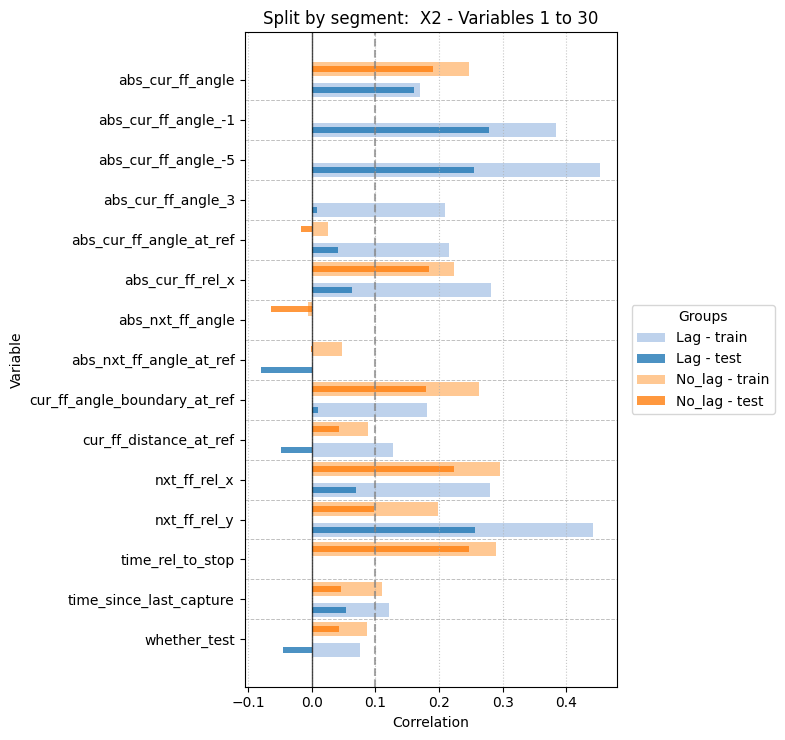

In [46]:
dataset_name = 'X2'
cross_view_sub = combined_cross_view_df[combined_cross_view_df['dataset'] == dataset_name]
cross_view_sub = cross_view_sub[cross_view_sub['variable'].isin(aug_features)]
cca_plot_lag_vs_no_lag.plot_cca_lag_vs_nolag_and_train_vs_test(cross_view_sub, dataset_name, mode='lag_offset',
                                                                title_prefix='Split by segment: ')


## not grouped by segment

In [47]:
combined_cross_view_df, combined_can_load_df = cca_cv_utils.combine_cca_cv_results(cca_no_lag, cca_lags, n_components=7, reg=0.1, n_splits=7,
                                                                               #groups=pn.y_var['segment'].values
                                                                               )

Training CCA, kernel = None, regularization = 0.1000, 7 components


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Training CCA, kernel = None, regularization = 0.1000, 7 components
Training CCA, kernel = None, regularization = 0.1000, 7 components


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Training CCA, kernel = None, regularization = 0.1000, 7 components
Training CCA, kernel = None, regularization = 0.1000, 7 components
Training CCA, kernel = None, regularization = 0.1000, 7 components
Training CCA, kernel = None, regularization = 0.1000, 7 components


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Training CCA, kernel = None, regularization = 0.1000, 7 components


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Training CCA, kernel = None, regularization = 0.1000, 7 components


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Training CCA, kernel = None, regularization = 0.1000, 7 components


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Training CCA, kernel = None, regularization = 0.1000, 7 components


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Training CCA, kernel = None, regularization = 0.1000, 7 components
Training CCA, kernel = None, regularization = 0.1000, 7 components


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Training CCA, kernel = None, regularization = 0.1000, 7 components


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


### cross-view X1

In [48]:
# dataset_name = 'X1'
# cross_view_sub = combined_cross_view_df[combined_cross_view_df['dataset'] == dataset_name]
# cca_plot_lag_vs_no_lag.plot_cca_lag_vs_nolag_and_train_vs_test(cross_view_sub, dataset_name, mode='lag_offset')


### cross-view X2

In [49]:
features = ['cur_ff_distance', 'cur_ff_angle', 'cur_ff_rel_x', 'cur_ff_rel_y', 'abs_cur_ff_angle', 'abs_cur_ff_rel_x',
            'nxt_ff_distance', 'nxt_ff_angle', 'nxt_ff_rel_x', 'nxt_ff_rel_y', 'abs_nxt_ff_angle', 'abs_nxt_ff_rel_x',
            'time_rel_to_stop', 'time_since_last_capture', 'whether_test']
aug_features = []
for feat in features:
    aug_features.extend([var for var in combined_cross_view_df.variable.values if feat in var])


In [50]:
raw_data_folder_path

'all_monkey_data/raw_monkey_data/monkey_Schro/data_0416'

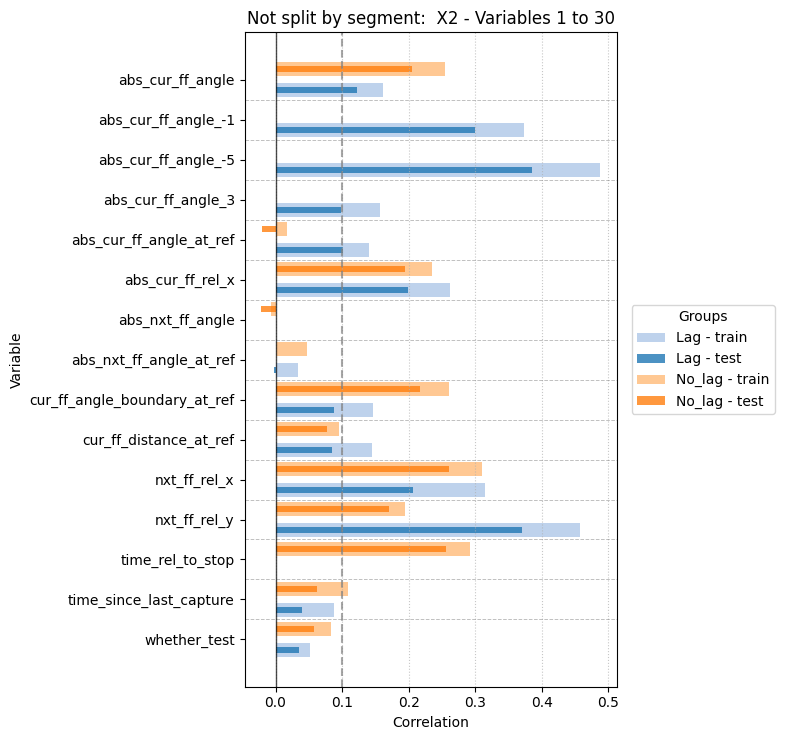

In [51]:
dataset_name = 'X2'
cross_view_sub = combined_cross_view_df[combined_cross_view_df['dataset'] == dataset_name]
cross_view_sub = cross_view_sub[cross_view_sub['variable'].isin(aug_features)]
cca_plot_lag_vs_no_lag.plot_cca_lag_vs_nolag_and_train_vs_test(cross_view_sub, dataset_name, mode='lag_offset',
                                                               title_prefix='Not split by segment: ')


In [52]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

# Just train vs test

In [ ]:
features = ['cur_ff_distance', 'cur_ff_angle', 'cur_ff_rel_x', 'cur_ff_rel_y', 'abs_cur_ff_angle', 'abs_cur_ff_rel_x',
            'nxt_ff_distance', 'nxt_ff_angle', 'nxt_ff_rel_x', 'nxt_ff_rel_y', 'abs_nxt_ff_angle', 'abs_nxt_ff_rel_x',
            'time_rel_to_stop', 'time_since_last_capture', 'whether_test']
aug_features = []
for feat in features:
    aug_features.extend([var for var in combined_cross_view_df.variable.values if feat in var])


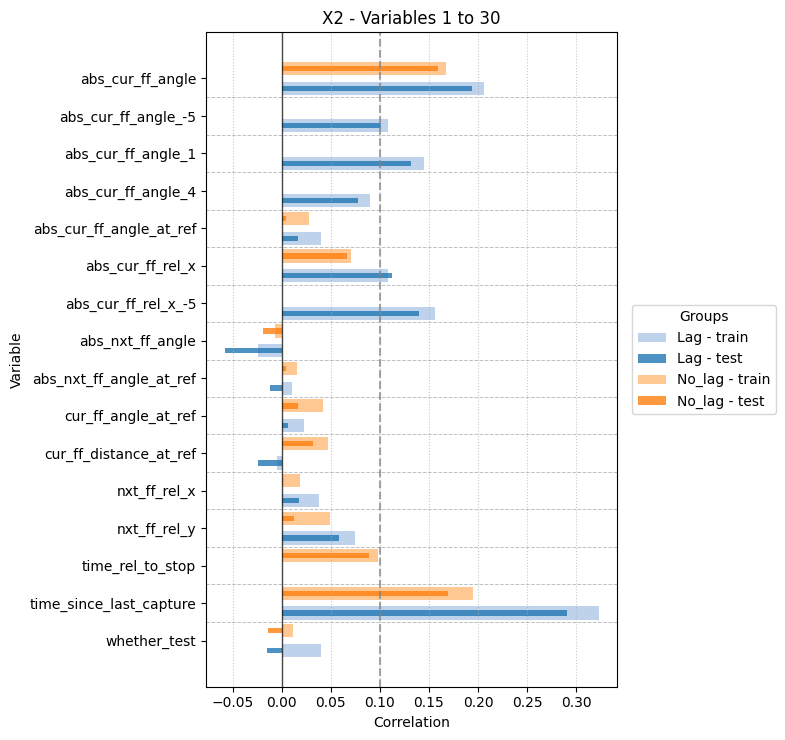

In [ ]:
dataset_name = 'X2'
cross_view_sub = combined_cross_view_df[combined_cross_view_df['dataset'] == dataset_name]
cross_view_sub = cross_view_sub[cross_view_sub['variable'].isin(aug_features)]
cca_plot_lag_vs_no_lag.plot_cca_lag_vs_nolag_and_train_vs_test(cross_view_sub, dataset_name, mode='lag_offset')


## cross-view X1

In [ ]:
# filter_significant = True
# sort_by_significance = True
# significance_threshold = 4
# whether_lag = 'lag'

# combined_cross_view_df_sub = combined_cross_view_df[combined_cross_view_df['whether_lag'] == whether_lag]

# # X1
# cca_plot_cv.plot_cca_cv_results(combined_cross_view_df_sub, data_type='X1',
#                                     filter_significant=filter_significant, sort_by_significance=sort_by_significance, significance_threshold=significance_threshold)


## cross-view X2

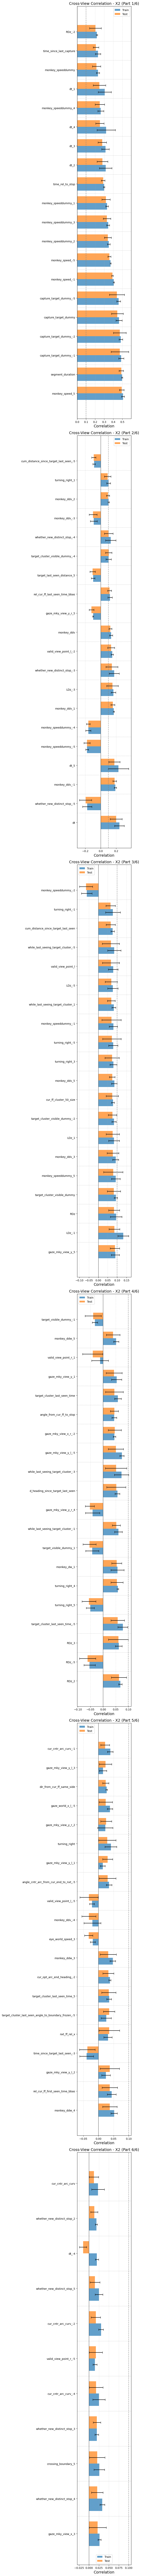

In [ ]:
filter_significant = True
sort_by_significance = True
significance_threshold = 1
whether_lag = 'lag'

combined_cross_view_df_sub = combined_cross_view_df[combined_cross_view_df['whether_lag'] == whether_lag]

# X2
cca_plot_cv.plot_cca_cv_results(combined_cross_view_df_sub, data_type='X2',
                                    filter_significant=filter_significant, sort_by_significance=sort_by_significance, significance_threshold=significance_threshold)


# Appendix

## reduce y_var only by vif

In [ ]:
pn.reduce_y_var(save_data=True,
                     corr_threshold_for_lags_of_a_feature=0.97,
                     vif_threshold_for_initial_subset=5, vif_threshold=5, verbose=True,
                     filter_corr_by_all_columns=False,
                     filter_vif_by_subsets=False,
                     filter_vif_by_all_columns=True,
                     exists_ok=False,
                     )

Getting y_var_reduced...

====================Among all columns, iteratively dropping columns with the highest VIF====================
Getting VIF for all 126 features...
Iter 1: Dropped bin (VIF: 45265332955.3)
Iter 2: Dropped monkey_x (VIF: 11706363.8)
Iter 3: Dropped monkey_y (VIF: 11574572.7)
Iter 4: Dropped delta_distance (VIF: 11104.7)
Iter 5: Dropped dir_from_cur_ff_to_stop (VIF: 5805.9)
Iter 6: Dropped cur_cntr_arc_end_heading (VIF: 1356.2)
Iter 7: Dropped cum_distance (VIF: 769.1)
Iter 8: Dropped cum_distance_when_target_last_seen (VIF: 3076.3)
Iter 9: Dropped segment (VIF: 666.7)
Iter 10: Dropped nxt_ff_distance (VIF: 284.6)
Iter 11: Dropped nxt_ff_angle (VIF: 219.5)
Iter 12: Dropped gaze_world_y (VIF: 214.4)
Iter 13: Dropped target_cluster_last_seen_distance (VIF: 175.0)
Iter 14: Dropped monkey_y_smr (VIF: 169.4)
Iter 15: Dropped monkey_x_smr (VIF: 144.8)
Iter 16: Dropped gaze_world_x_r (VIF: 117.4)
Iter 17: Dropped target_last_seen_distance (VIF: 97.3)
Iter 18: Dropped nxt_

## check final VIF

In [ ]:
vif_df = drop_high_vif_vars.get_vif_df(pn.y_var_reduced)
vif_df

feature                     vif
0           distance_from_monkey_pos_target_last_seen                 4.70000
1                                   gaze_mky_view_y_r                 4.30000
2                                   gaze_mky_view_x_r                 4.20000
3                                          curv_range                 3.80000
4                                     gaze_mky_view_y                 3.70000
5                                      gaze_world_y_l                 3.70000
6                       monkey_angle_target_last_seen                 3.50000
7                                  valid_view_point_l                 3.50000
8                                        monkey_angle                 3.50000
9                              cur_ff_distance_at_ref                 3.30000
10                                           curv_iqr                 3.30000
11                          monkey_y_target_last_seen                 3.20000
12                                       target_rel_x                 3.20000
13                                       nxt_ff_rel_x                 3.10000
14                    rel_cur_ff_first_seen_time_bbas                 3.10000
15                              gaze_mky_view_angle_l                 3.10000
16                                          monkey_dw                 3.00000
17                                 valid_view_point_r                 2.90000
18                               target_visible_dummy                 2.70000
19  target_cluster_has_disappeared_for_last_time_d...                 2.70000
20                                   cur_opt_arc_curv                 2.40000
21                   while_last_seeing_target_cluster                 2.40000
22                                      turning_right                 2.30000
23                                    gaze_mky_view_x                 2.30000
24                                       monkey_speed                 2.20000
25                                                LDz                 2.10000
26         target_cluster_last_seen_angle_to_boundary                 2.10000
27                          dir_from_cur_ff_to_nxt_ff                 2.10000
28                                  nxt_cntr_arc_curv                 2.10000
29                             nxt_ff_distance_at_ref                 1.90000
30                     rel_cur_ff_last_seen_time_bbas                 1.90000
31                                  gaze_mky_view_y_l                 1.90000
32                                cur_ff_angle_at_ref                 1.80000
33                            time_since_last_capture                 1.80000
34                                  monkey_speeddummy                 1.80000
35                                       target_angle                 1.80000
36                                  cur_cntr_arc_curv                 1.70000
37                 angle_from_m_before_stop_to_cur_ff                 1.60000
38                             cur_ff_cluster_50_size                 1.60000
39                   d_heading_since_target_last_seen                 1.50000
40                          whether_new_distinct_stop                 1.40000
41                                    eye_world_speed                 1.40000
42                          angle_from_cur_ff_to_stop                 1.40000
43                               capture_target_dummy                 1.30000
44                                       whether_test                 1.20000
45                      target_cluster_last_seen_time                 1.10000
46                                         monkey_ddw                 1.10000
47                          dir_from_cur_ff_same_side                 1.10000
48                                         monkey_ddv                 1.10000
49                          monkey_x_target_last_seen                 1.00000
50                                  crossing_boundary               

In [ ]:
vif_df = drop_high_vif_vars.get_vif_df(pn.y_var_lags_reduced)
vif_df

feature     vif
0          gaze_mky_view_y_5 5.00000
1       gaze_mky_view_y_r_-3 5.00000
2    target_visible_dummy_-5 5.00000
3       valid_view_point_l_5 4.90000
4    capture_target_dummy_-2 4.80000
..                       ...     ...
229                    dt_-1 1.00000
230                    dt_-5 1.00000
231                    dt_-4 1.00000
232                    dt_-3 1.00000
233                    dt_-2 1.00000

[234 rows x 2 columns]

## check correlations in y_var_lags

In [ ]:
# sort pn.y_var_lags by column str a to z
pn.y_var_lags2 = pn.y_var_lags.reindex(sorted(pn.y_var_lags.columns), axis=1)

# # sort pn.y_var_lags by column str z to a
# pn.y_var_lags_reduced = pn.y_var_lags_reduced.reindex(sorted(pn.y_var_lags_reduced.columns, reverse=True), axis=1)

In [ ]:
pn.y_var_lags2.iloc[:, :10]

LDy_-1    LDy_-2    LDy_-3    LDy_-4    LDy_-5     LDy_0     LDy_1  \
0    -66.00000  12.03696  10.25252   8.69711   6.42416  48.32587  48.32587   
1     12.03696  10.25252   8.69711   6.42416 -14.98766 -66.00000  48.32587   
2     10.25252   8.69711   6.42416 -14.98766 -14.71078  12.03696 -66.00000   
3      8.69711   6.42416 -14.98766 -14.71078 -15.07463  10.25252  12.03696   
4      6.42416 -14.98766 -14.71078 -15.07463 -13.63229   8.69711  10.25252   
...        ...       ...       ...       ...       ...       ...       ...   
9636   2.73932   4.98328   3.90479   2.82050   2.82050   0.73019  -1.48622   
9637   4.98328   3.90479   2.82050   2.82050   2.82050   2.73932   0.73019   
9638   3.90479   2.82050   2.82050   2.82050   2.82050   4.98328   2.73932   
9639   2.82050   2.82050   2.82050   2.82050   2.82050   3.90479   4.98328   
9640   2.82050   2.82050   2.82050   2.82050   2.82050   2.82050   3.90479   

         LDy_2     LDy_3     LDy_4  
0     48.32587  48.32587  48.32587  
1     48.32587  48.32587  48.32587  
2     48.32587  48.32587  48.32587  
3    -66.00000  48.32587  48.32587  
4     12.03696 -66.00000  48.32587  
...        ...       ...       ...  
9636  -7.69479  -8.32391 -14.01064  
9637  -1.48622  -7.69479  -8.32391  
9638   0.73019  -1.48622  -7.69479  
9639   2.73932   0.73019  -1.48622  
9640   4.98328   2.73932   0.73019  

[9641 rows x 10 columns]

In [ ]:
pn.y_var_lags2.iloc[:, :10].corr()

LDy_-1  LDy_-2  LDy_-3  LDy_-4  LDy_-5   LDy_0   LDy_1   LDy_2  \
LDy_-1 1.00000 0.54759 0.42010 0.37732 0.31456 0.53002 0.35882 0.29559   
LDy_-2 0.54759 1.00000 0.62278 0.48691 0.41885 0.36712 0.28542 0.22809   
LDy_-3 0.42010 0.62278 1.00000 0.68457 0.54839 0.32674 0.24484 0.20512   
LDy_-4 0.37732 0.48691 0.68457 1.00000 0.73890 0.28355 0.21996 0.16381   
LDy_-5 0.31456 0.41885 0.54839 0.73890 1.00000 0.24573 0.16639 0.12217   
LDy_0  0.53002 0.36712 0.32674 0.28355 0.24573 1.00000 0.55060 0.40083   
LDy_1  0.35882 0.28542 0.24484 0.21996 0.16639 0.55060 1.00000 0.58448   
LDy_2  0.29559 0.22809 0.20512 0.16381 0.12217 0.40083 0.58448 1.00000   
LDy_3  0.24544 0.19750 0.16017 0.12719 0.09751 0.34475 0.44574 0.61106   
LDy_4  0.21093 0.15267 0.12249 0.09840 0.07906 0.29058 0.38550 0.48442   

         LDy_3   LDy_4  
LDy_-1 0.24544 0.21093  
LDy_-2 0.19750 0.15267  
LDy_-3 0.16017 0.12249  
LDy_-4 0.12719 0.09840  
LDy_-5 0.09751 0.07906  
LDy_0  0.34475 0.29058  
LDy_1  0.44574 0.38550  
LDy_2  0.61106 0.48442  
LDy_3  1.00000 0.63633  
LDy_4  0.63633 1.00000

## check high corr within feature's lagged columns

In [ ]:
df_with_lags = pn.y_var_lags2.copy()
num_original_columns = len(df_with_lags.columns)
base_features = drop_high_corr_vars.get_base_feature_names(df_with_lags)
columns_dropped = []
top_values_by_feature = pd.DataFrame()
for i, feature in enumerate(base_features):
    df_with_lags_sub = drop_high_corr_vars._find_subset_of_df_with_lags_for_current_feature(
        df_with_lags, feature)
    # temp_columns_to_drop, top_values_of_feature = drop_high_corr_vars._drop_lags_for_feature(
    #     df_with_lags, feature, corr_threshold, vif_threshold, use_vif_instead_of_corr, drop_lag_0_last_in_vif)
    if df_with_lags_sub.corr().iloc[1,2] == 1:
        print(feature)

segment
target_index
dir_from_cur_ff_to_stop
segment_duration
nxt_ff_distance_at_ref
current_target_caught_time
cur_ff_angle_boundary_at_ref
cur_ff_cluster_50_size
cur_ff_angle_at_ref
angle_from_cur_ff_to_stop
last_target_caught_time
nxt_ff_angle_at_ref
rel_cur_ff_first_seen_time_bbas
target_y
stop_time
whether_test
cur_ff_distance_at_ref
angle_from_m_before_stop_to_nxt_ff
nxt_ff_index
cur_ff_index
target_x
dir_from_cur_ff_same_side
rel_cur_ff_last_seen_time_bbas
curv_iqr
trial
seg_end_time
angle_from_cur_ff_to_nxt_ff
curv_range
seg_start_time
angle_from_m_before_stop_to_cur_ff
dir_from_cur_ff_to_nxt_ff


## Compare columns in behav_data (target_decoder) and final_behavioral_data (neural_vs_behavioral_class)

In [ ]:
pn.get_behav_data(exists_ok=False)

AttributeError: 'PlanningAndNeural' object has no attribute 'get_behav_data'

In [ ]:
data_item = neural_vs_behavioral_class.NeuralVsBehavioralClass(raw_data_folder_path=raw_data_folder_path)
data_item.streamline_preparing_neural_and_behavioral_data()

In [ ]:
# Columns in pn.behav_data_by_bin but not in data_item.final_behavioral_data
only_in_pn = set(pn.behav_data_by_bin.columns) - set(data_item.final_behavioral_data.columns)
print("Columns only in pn.behav_data_by_bin:")
only_in_pn = np.array(sorted(only_in_pn))
print(only_in_pn)
print('\n \n')

# Columns in data_item.final_behavioral_data but not in pn.behav_data_by_bin
final_behavioral_data_columns = data_item.final_behavioral_data.columns
# remove all 'avg_bin_' prefix
final_behavioral_data_columns = [col.replace('avg_bin_', '') for col in final_behavioral_data_columns]
only_in_data_item = set(final_behavioral_data_columns) - set(pn.behav_data_by_bin.columns)
print("Columns only in data_item.final_behavioral_data:")
only_in_data_item = np.array(sorted(only_in_data_item))
print(only_in_data_item)

In [ ]:
pn.cur_and_nxt_ff_from_ref_df.columns

In [ ]:
pn.test_plan_data_inst.df.columns

## just get planning_timestep_data

In [ ]:
planning_data_by_point_exists_ok = False

raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"
ref_point_mode='time after cur ff visible'
ref_point_value=0.1
normalize = False
eliminate_outliers = False
use_curv_to_ff_center = False
curv_of_traj_mode = 'distance'
window_for_curv_of_traj=[-25, 25]
truncate_curv_of_traj_by_time_of_capture = True

   # get behavioral_data
ph = pn_helper_class.PlanningAndNeuralHelper(raw_data_folder_path=raw_data_folder_path)

ph.load_raw_data(raw_data_folder_path)
ph.prep_behav_data_to_analyze_planning(ref_point_mode=ref_point_mode,
                                                            ref_point_value=ref_point_value,
                                                            curv_of_traj_mode=curv_of_traj_mode,
                                                            window_for_curv_of_traj=window_for_curv_of_traj,
                                                            truncate_curv_of_traj_by_time_of_capture=truncate_curv_of_traj_by_time_of_capture,
                                                            use_curv_to_ff_center=use_curv_to_ff_center,
                                                            eliminate_outliers=eliminate_outliers,
                                                            planning_data_by_point_exists_ok=planning_data_by_point_exists_ok
                                                            )

## check corr

In [ ]:
pn.y_var_reduced[['seg_start_time', 'seg_end_time']].corr()

seg_start_time  seg_end_time
seg_start_time         1.00000       1.00000
seg_end_time           1.00000       1.00000

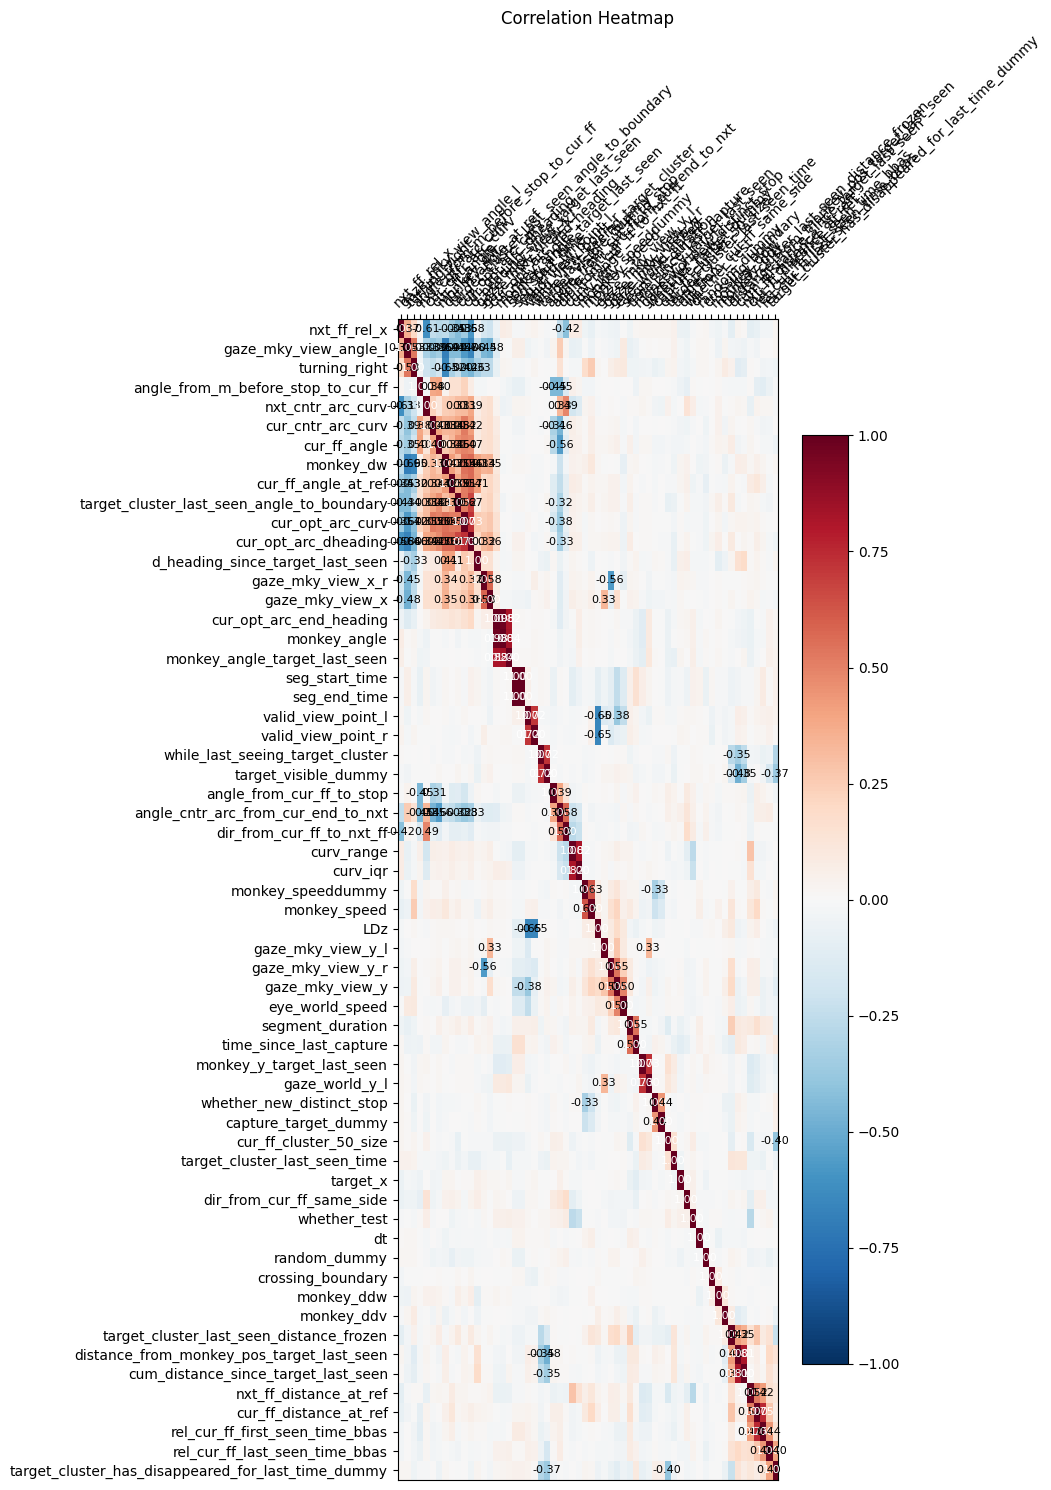

In [ ]:
ml_plotting_utils.plot_correlation_heatmap(pn.y_var_reduced.corr(), annotation_threshold=0.3)